# DATA WRANGLING - `WERATEDOGS` TWITTER PAGE
***

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

***

## Introduction

>Data Wrangling is an important skill for any data enthusiast who wishes to derive meaning from data. Real world data rarely comes clean.Unclean data will lead to false outcomes, wrong decisions and the meaning or information derived will not be credible. Hence it is important to always wrangle data before using it. We will be using Python and its libraries to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

After Data Wrangling, we will see what data will speak to us!

## About Dataset
>The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Process

Data Wrangling has 3 major steps.
- Gather
- Assess
- Clean

We will go step by step. As we proceed we will re-assess and re-iterate the dataset if necessary

## DATA GATHERING

For our Analysis, we will get data from 3 sources.
1. Archive data - `WeRateDogs` tweet data archived in 'csv' file format. The file is not raw data but some preprocessing has already been done.
2. Tweet data - using `Archive` data, we will collect the complete tweet data from twitter and see if we can find some information that we can add for our analysis
3. Image predictions data - This data is available in cloud. We will download the data programatically and use in our analysis. The dataset contains predictions of a trained image classifier, that predicts the dog breed.

#### PRE-REQUISITES

In [1]:
# code added because 'seaborn' package in workspace
# is not latest and causes error in code
# if pip installs latest seaborn, please restart kernel and run all
# if package is up-to-date code will run just fine
!pip install --upgrade seaborn

    100% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 215kB 1.8MB/s eta 0:00:01
    100% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12.9MB 35kB/s  eta 0:00:01  3% |‚ñà‚ñè                              | 471kB 14.1MB/s eta 0:00:01    13% |‚ñà‚ñà‚ñà‚ñà‚ñå                           | 1.8MB 30.9MB/s eta 0:00:01    24% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                        | 3.1MB 18.8MB/s eta 0:00:01    34% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                     | 4.4MB 22.7MB/s eta 0:00:01    54% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã              | 7.1MB 18.4MB/s eta 0:00:01
    100% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.9MB 52kB/s  eta 0:00:01    42% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                  | 3.8MB 27.8MB/s eta 0:00:01    72% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

In [2]:
# importing modules used in the project
import numpy as np
import pandas as pd
import requests
import json
import tweepy
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import datetime

# helps to create inline plots
%matplotlib inline

# set style of plot
sns.set(style='white')

# set column width for full text display
pd.set_option('display.max_colwidth', -1)

In [3]:
# downlaod nltk dependency modules
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [4]:
# set options for float and text
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Now that the basic setup is done, we will begin.

#### LOAD ARCHIVE DATA FILE (CSV)

Archive data file is stored as `twitter-archive-enhanced.csv`.

In [5]:
# load `archive` data as dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
# dataframe information
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

    Observation: 
    1. dimension - 2356 rows and 17 columns
    2. 181 records are retweets(from retweeted_status_id column)
    3. timestamp column is stored as `string`
    4. [in_reply_to_status_id,in_reply_to_user_id] columns have only 78 non-null values
    5. dog 'stages' are stored as separate columns

#### LOAD IMAGE PREDICTION DATA FROM URL

Image prediction data is stored as `image-predictions.tsv`. It is in `.tsv` format. We will download the dataset using `requests` module

In [7]:
# set URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get data from URL
response = requests.get(url)

In [8]:
# store data in file
with open(url.split('/')[-1],'wb') as outfile:
    outfile.write(response.content)

In [9]:
# read `tsv` file and load as dataframe
df_img = pd.read_csv('image-predictions.tsv',sep='\t')

In [10]:
# dataframe information
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


    Observation:
    1. dimension - 2075 rows and 12 columns
    2. top 3 predictions by classifier for each image is stored in separate columns.

#### LOAD TWEET DATA FROM TWITTER PAGE (JSON FILE)

We will be using the Twitter API `tweepy` to gather data from Twitter. The Twitter developer portal has information that can help in understanding data structure, variables and the method of data transfer.<br>
- [Twitter Developer Portal](https://developer.twitter.com/en/docs/basics/getting-started)

Tweepy documentation provides details on how to use `tweepy` application to connect to Twitter and gather data<br>
- [Tweepy Documentation](https://tweepy.readthedocs.io/en/v3.5.0/)

In [11]:
# set keys for OAuth
consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

# create OAuth handler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# set access token
auth.set_access_token(access_token, access_secret)

# open connection using API
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [12]:
# list tweet_id's in `archive` dataset
id_list = list(df_archive.tweet_id)

In [13]:
# length of id list
len(id_list)

2356

Now that we got the tweet_id from `archive` dataset, we will query Twitter API for each ID and get data.

In [14]:
# initiate variables
data=[]
missing_id = {}
missing_id['error'] = []

# iterate for each tweet id
for _id in id_list:
    try:
        # get tweet data
        rec = api.get_status(_id,tweet_mode='extended')
        data.append(rec._json)
    except tweepy.TweepError:
        missing_id['error'].append({
            'id':_id,
            'error_text': tweepy.TweepError
        })

Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 732


In [15]:
# number of ids missing
len(missing_id)

1

In [16]:
# length of dataset downloaded from twitter
len(data)

2342

In [17]:
# write tweet data to file
with open('tweet_json.txt','w') as outfile:
    json.dump(data,outfile)

The twitter data is available in `tweet_json.txt`. It is stored in `json` format. We will load the data from file.

In [18]:
# read `json` file
with open('tweet_json.txt','r') as file:
    data_json = json.load(file)

In [19]:
# load `json` data as dataframe
df_raw = pd.DataFrame.from_dict(data_json,orient='columns')

In [20]:
# dataframe information
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

    Observation:
    1. dimension - 2341 rows and 32 columns
    2. many columns have less than 200 non-null values

In [21]:
# get top 1 row
df_raw.head(1)

contributors coordinates                      created_at display_text_range  \
0  None         None        Tue Aug 01 16:23:56 +0000 2017  [0, 85]             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}   

   favorite_count  favorited  \
0  38146           False       

                                                                                                       full_text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   

    geo  \
0  None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ...                             

The dataframe contains more data which we will not be using for our analysis. We will only use required columns. `user` column looks interesting. Let's see

In [22]:
# display user record
df_raw.user[1]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs‚Ñ¢',
 'screen_name': 'dog_rates',
 'location': 'merch  ‚á®',
 'description': 'Your Only Source For Professional Dog Ratings ‚†Ä ‚†ÄIG, FB, Snapchat ‚á® WeRateDogs ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 7508228,
 'friends_count': 11,
 'listed_count': 5619,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 140454,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 9381,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image

This is actually an `user object` with user data. The Twitter documentation for `user objects` lists the description for each of these columns. Link below:
- [User Object Documentation](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object)

We will get the user_id,user_name,followers_count from `user` column. But what do those columns mean?

- **id** : The integer representation of the unique identifier for this User
- **name** : The name of the user, as they‚Äôve defined it. Not necessarily a person‚Äôs name
- **followers_count** : The number of followers the user currently has

In [23]:
# initiate variables
user_id = []
user_name = []
user_followers = []

# get all user data
user_data = df_raw.user

In [24]:
# get id, name, follower_count for every user
for user in user_data:
    user_id.append(user['id'])
    user_name.append(user['name'])
    user_followers.append(user['followers_count'])

In [25]:
#print values
print(len(user_id))
print(len(user_name))
print(len(user_followers))

2342
2342
2342


We will create a new dataframe that holds only necessary data columns like *id, retweet_count, favorite_count* columns from `df_raw` dataframe. Their meaning?

- **id** : The integer representation of the unique identifier for a Tweet
- **retweet_count** : Number of times the Tweet has been retweeted
- **favorite_count** : Indicates approximately how many times the Tweet has been liked by Twitter users

These details can be found in Twitter documentation for `Tweet objects`.
- [Tweet Object Documentation](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)

In [26]:
# create new dataframe
df_json = df_raw[['id','retweet_count','favorite_count']].copy()

In [27]:
# dataframe information
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [28]:
df_json['user_id'] = user_id
df_json['user_name'] = user_name
df_json['user_followers_count'] = user_followers

In [29]:
# dataframe information
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
id                      2342 non-null int64
retweet_count           2342 non-null int64
favorite_count          2342 non-null int64
user_id                 2342 non-null int64
user_name               2342 non-null object
user_followers_count    2342 non-null int64
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


In [30]:
# get top 5 rows
df_json.head()

id  retweet_count  favorite_count     user_id    user_name  \
0  892420643555336193  8346           38146           4196983835  WeRateDogs‚Ñ¢   
1  892177421306343426  6168           32716           4196983835  WeRateDogs‚Ñ¢   
2  891815181378084864  4082           24637           4196983835  WeRateDogs‚Ñ¢   
3  891689557279858688  8488           41491           4196983835  WeRateDogs‚Ñ¢   
4  891327558926688256  9182           39658           4196983835  WeRateDogs‚Ñ¢   

   user_followers_count  
0  7508228               
1  7508228               
2  7508228               
3  7508228               
4  7508228

In [31]:
# delete to free up memory space - entries from recent to old
del user_id,user_name,user_followers
del user_data
del df_raw
del data_json
del response
del url

***

## DATA ASSESSING

Now that we have gathered our data from various sources, lets start the next step. We will be checking for *Quality* and *Tidiness* issues in our datasets. Lets define **Quality** and **Tidy**.

- **Quality:** issues with content. Low quality data is also known as dirty data.
- **Tidiness:** issues with structure that prevent easy analysis. Untidy data is also known as messy data.

In order for dat to be Tidy it should have the following qualities:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

This resource from Hadley Wickham provides more clarity on Tidy data.
- [Tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)

From our prior observations, we have identified the following issues.

**Image Prediction Dataset**

1. 281 records missing - has only 2075 records

**Archive Dataset**

1. 181 records are retweets(from *retweeted_status_id* column)


2. *timestamp* column is stored as **string**


3. *in_reply_to_status_id*,*in_reply_to_user_id* columns have only 78 non-null values


4. dog *'stages'* columns can be merged as single column

Let's check for other issues

In [32]:
# get top 5 rows
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193 nan                    nan                    
1  892177421306343426 nan                    nan                    
2  891815181378084864 nan                    nan                    
3  891689557279858688 nan                    nan                    
4  891327558926688256 nan                    nan                    

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0 nan                  nan                        NaN                         
1 nan                  nan                        NaN                         
2 nan                  nan                        NaN                         
3 nan                  nan                        NaN                         
4 nan                  nan                        NaN                         

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0  13                10                  Phineas   None  None    None   None  
1  13                10                  Tilly     None  None    None   None  
2  12                10                  Archie    None  None    None   None  
3  13                10                  Darla     None  None    None   None  
4  12                10                  Franklin  None  None    None   None

Lets checkout `source` column

In [33]:
# get count of unique source for tweets
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

source column has only 4 unique values.

    Observation:
    1. source column can be simplified

In [34]:
# get last 5 rows
df_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465 nan                    nan                    
2352  666044226329800704 nan                    nan                    
2353  666033412701032449 nan                    nan                    
2354  666029285002620928 nan                    nan                    
2355  666020888022790149 nan                    nan                    

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                             text  \
2351  Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq                      
2352  This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx     
2353  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR            
2354  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2355  Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj           

      retweeted_status_id  retweeted_status_user_id  \
2351 nan                  nan                         
2352 nan                  nan                         
2353 nan                  nan                         
2354 nan                  nan                         
2355 nan                  nan                         

     retweeted_status_timestamp  \
2351  NaN                         
2352  NaN                         
2353  NaN                         
2354  NaN                         
2355  NaN                         

                                                        expanded_urls  \
2351  https://twitter.com/dog_rates/status/666049248165822465/photo/1   
2352  https://twitter.com/dog_rates/status/666044226329800704/photo/1   
2353  https://twitter.com/dog_rates/status/666033412701032449/photo/1   
2354  https://twitter.com/dog_rates/status/666029285002620928/photo/1   
2355  https://twitter.com/dog_rates/status/666020888022790149/photo/1   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
2351  5                 10                  None  None  None    None   None  
2352  6                 10                  a     None  None    None   None  
2353  9                 10                  a     None  None    None   None  
2354  7                 10                  a     None  None    None   None  
2355  8                 10                  None  None  None    None   None

We can see that the name column has value *'a'* instead of proper names. Lets check if we have more values like that

In [35]:
# get count of unique names
df_archive.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Cooper       11 
Lucy         11 
Penny        10 
Lola         10 
Tucker       10 
Bo           9  
Winston      9  
the          8  
Sadie        8  
Daisy        7  
Toby         7  
an           7  
Buddy        7  
Bailey       7  
Stanley      6  
Oscar        6  
Rusty        6  
Scout        6  
Jack         6  
Leo          6  
Koda         6  
Dave         6  
Bella        6  
Milo         6  
Jax          6  
Gus          5  
            ..  
Severus      1  
Gabby        1  
Billl        1  
Darla        1  
Zuzu         1  
Jarvis       1  
Timber       1  
Dante        1  
Tuco         1  
Taco         1  
Alexander    1  
his          1  
Jersey       1  
G√≤rd√≥n       1  
Monkey       1  
Traviss      1  
Dallas       1  
Stuart       1  
Terrenth     1  
Emma         1  
Arlen        1  
Mason        1  
Fabio        1  
Lenox        1  
Hamrick      1  
Torque       1  
Combo        1  
Juckson     

We can see that the `name` column has values like **a,the,an** in the list. Maybe there are more. We'll identify all such values

In [36]:
# get count of unique names that start with lower case
df_archive[df_archive.name.str.contains(r'^[a-z].*')].name.value_counts()

a               55
the             8 
an              7 
very            5 
quite           4 
just            4 
one             4 
getting         2 
mad             2 
not             2 
actually        2 
space           1 
life            1 
by              1 
this            1 
all             1 
old             1 
incredibly      1 
officially      1 
my              1 
his             1 
light           1 
unacceptable    1 
infuriating     1 
such            1 
Name: name, dtype: int64

There are 25 unique values.

    Observation:
    1. name column must be corrected

I'm curious about rating related columns. What about those column? will they have any issues?!

In [37]:
# get count of unique rating_numerator
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

Let's check some suspicious values

In [38]:
df_archive[df_archive.rating_numerator==0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546 nan                    nan                    
1016  746906459439529985 746885919387574272.000 4196983835.000         

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                                                  source  \
315   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1016  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                         text  \
315   When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag         
1016  PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX   

      retweeted_status_id  retweeted_status_user_id  \
315  nan                  nan                         
1016 nan                  nan                         

     retweeted_status_timestamp  \
315   NaN                         
1016  NaN                         

                                                                                                                                                                                        expanded_urls  \
315   https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1   
1016  https://twitter.com/dog_rates/status/746906459439529985/photo/1                                                                                                                                   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
315   0                 10                  None  None  None    None   None  
1016  0                 10                  None  None  None    None   None

In [39]:
df_archive[df_archive.rating_numerator==75]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
340  832215909146226688 nan                    nan                    
695  786709082849828864 nan                    nan                    

                     timestamp  \
340  2017-02-16 13:11:49 +0000   
695  2016-10-13 23:23:56 +0000   

                                                                                 source  \
340  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
695  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                             text  \
340  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu‚Ä¶   
695  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS               

       retweeted_status_id  retweeted_status_user_id  \
340 786709082849828864.000 4196983835.000              
695 nan                    nan                         

    retweeted_status_timestamp  \
340  2016-10-13 23:23:56 +0000   
695  NaN                         

                                                       expanded_urls  \
340  https://twitter.com/dog_rates/status/786709082849828864/photo/1   
695  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator  rating_denominator   name doggo floofer pupper puppo  
340  75                10                  Logan  None  None    None   None  
695  75                10                  Logan  None  None    None   None

We can see that the actual rating is *9.75/10* but the rating column has *75/10*

In [40]:
# get count of unique rating_denominator
df_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [41]:
df_archive[df_archive.rating_denominator==11]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
784   775096608509886464 nan                    nan                    
1068  740373189193256964 nan                    nan                    
1662  682962037429899265 nan                    nan                    

                      timestamp  \
784   2016-09-11 22:20:06 +0000   
1068  2016-06-08 02:41:38 +0000   
1662  2016-01-01 16:30:13 +0000   

                                                                                  source  \
784   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1662  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                              text  \
784   RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/‚Ä¶   
1068  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1662  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5    

        retweeted_status_id  retweeted_status_user_id  \
784  740373189193256960.000 4196983835.000              
1068 nan                    nan                         
1662 nan                    nan                         

     retweeted_status_timestamp  \
784   2016-06-08 02:41:38 +0000   
1068  NaN                         
1662  NaN                         

                                                                                                                                                                                                                                                        expanded_urls  \
784   https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1   
1068  https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1   
1662  https://twitter.com/dog_rates/status/682962037429899265/photo/1                                                                                                                                                                                                   

      rating_numerator  rating_denominator    name doggo floofer pupper puppo  
784   9                 11                  None    None  None    None   None  
1068  9                 11                  None    None  None    None   None  
1662  7                 11                  Darrel  None  None    None   None

It is clear that the text speaks about *9/11* attack. But the rating columns have *9/11* instead of actual rating value *14/10*. In another case, the value is *7/11* instead of *10/10*

In [42]:
df_archive[df_archive.rating_denominator==2]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2335  666287406224695296 nan                    nan                    

                      timestamp  \
2335  2015-11-16 16:11:11 +0000   

                                                                                  source  \
2335  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                          text  \
2335  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      retweeted_status_id  retweeted_status_user_id  \
2335 nan                  nan                         

     retweeted_status_timestamp  \
2335  NaN                         

                                                        expanded_urls  \
2335  https://twitter.com/dog_rates/status/666287406224695296/photo/1   

      rating_numerator  rating_denominator name doggo floofer pupper puppo  
2335  1                 2                   an   None  None    None   None

Similar to previous rows, the actual rating is *9/10* but rating column has *1/2*

    Observation:
    1. rating_numerator column must be corrected
    2. rating_denominator column must be corrected
    3. rating_numerator column should support float values

In [43]:
# get top 5 rows
df_img.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1  p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel 0.465     True    collie               
1  1        redbone                0.507     True    miniature_pinscher   
2  1        German_shepherd        0.596     True    malinois             
3  1        Rhodesian_ridgeback    0.408     True    redbone              
4  1        miniature_pinscher     0.560     True    Rottweiler           

   p2_conf  p2_dog                   p3  p3_conf  p3_dog  
0 0.157     True    Shetland_sheepdog   0.061     True    
1 0.074     True    Rhodesian_ridgeback 0.072     True    
2 0.139     True    bloodhound          0.116     True    
3 0.361     True    miniature_pinscher  0.223     True    
4 0.244     True    Doberman            0.155     True

In [44]:
# get last 5 rows
df_img.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1  p1_conf  p1_dog                  p2  p2_conf  \
2070  2        basset      0.556     True    English_springer   0.226      
2071  1        paper_towel 0.170     False   Labrador_retriever 0.168      
2072  1        Chihuahua   0.716     True    malamute           0.078      
2073  1        Chihuahua   0.324     True    Pekinese           0.091      
2074  1        orange      0.097     False   bagel              0.086      

      p2_dog                           p3  p3_conf  p3_dog  
2070  True    German_short-haired_pointer 0.175     True    
2071  True    spatula                     0.041     False   
2072  True    kelpie                      0.031     True    
2073  True    papillon                    0.069     True    
2074  False   banana                      0.076     False

We see that the prediction algorithm can predict non-dog values also. If the prediction is non-dog, the \_dog colum for p1,p2,p3 is *False*

    Observation:
    1. Prediction column can be simplified

In [45]:
# get top 5 rows
df_json.head()

id  retweet_count  favorite_count     user_id    user_name  \
0  892420643555336193  8346           38146           4196983835  WeRateDogs‚Ñ¢   
1  892177421306343426  6168           32716           4196983835  WeRateDogs‚Ñ¢   
2  891815181378084864  4082           24637           4196983835  WeRateDogs‚Ñ¢   
3  891689557279858688  8488           41491           4196983835  WeRateDogs‚Ñ¢   
4  891327558926688256  9182           39658           4196983835  WeRateDogs‚Ñ¢   

   user_followers_count  
0  7508228               
1  7508228               
2  7508228               
3  7508228               
4  7508228

In [46]:
sum(df_json.id.duplicated())

0

In [47]:
# get count of unique user names
df_json.user_name.value_counts()

WeRateDogs‚Ñ¢    2342
Name: user_name, dtype: int64

Looks like we only have 1 unique value in `user_name` column.

    Observation:
    1. user_name,user_id columns have only 1 unique value

In [48]:
# get count of unique followers_count
df_json.user_followers_count.value_counts()

7508274    263
7508228    201
7508327    188
7508233    177
7508269    175
7508326    173
7508231    136
7508270    121
7508272    110
7508229    105
7508273    100
7508235    76 
7508324    76 
7508268    68 
7508234    64 
7508230    62 
7508232    55 
7508328    46 
7508322    32 
7508267    25 
7508321    22 
7508271    20 
7508323    10 
7508275    8  
7508325    4  
7508799    4  
7508236    3  
7508844    3  
7508845    3  
7508898    2  
7508804    2  
7508846    2  
7508802    1  
7508892    1  
7508895    1  
7508801    1  
7508843    1  
7508897    1  
Name: user_followers_count, dtype: int64

Let's wrap out findings together

#### QUALITY ISSUES

##### `archive` table

1. `timestamp` column datatype is string - should be datetime


2. `source` column must be simplified


3. `rating_numerator` column must be corrected


4. `rating_denominator` column must be corrected


5. `rating_numerator` column should support float values


6. `name` column must be corrected


7. 181 rows are retweets (info from `retweeted_status_id` column)


8. `in_reply_to_status_id`,`in_reply_to_user_id columns` have only 78 non-null values - can be removed


9. `user_name`,`user_id` columns have only 1 unique value

##### `img` table

1. 281 records missing - has only 2075 records


#### TIDY ISSUES

1. number of retweets, favorites(likes), image details must be part of `archive` table. Single dataframe with all required information


2. dog 'stage' in 4 columns [ *doggo,floofer,pupper,puppo* ] can be simplified


3. prediction in 9 columns [ *prediction,conf,dog* ] can be simplified


4. new `hashtag` column can be created from text


5. new `gender` column can be created from text


6. column names are not clear


Although we have listed the identified issues from data assessment process, data cleaning will reveal more underlying problems that we might have missed to identify in our assessment. When we face such issues, we will clean them also in addition to the above identified issues.

***

## DATA CLEANING

    We have gathered and assessed our data. Now its time for action. Let's go!

First we will deal with **Tidy** issues because *Tidy* data makes cleaning easier. We will clean Tidy and Quality issues as per their importance and impact. Both these issues are inter-related to each other. Hence we will proceed cleaning along with the data structure and its flow.

We are going to merge all 3 dataframes into single dataframe. Before we begin, it is always good practise to create a clean copy of dataframe and work on it. In case, when needed the old dataframe is still untouched.

In [49]:
# copy dataframes
archive_clean = df_archive.copy()
json_clean = df_json.copy()
img_clean = df_img.copy()

### Tidy issue 1 : merge 3 dataframes into 1

we will merge 3 dataframes into 1 dataframe - `dog_ratings`

In [50]:
# merge archive and json dataframes
dog_ratings = pd.merge(archive_clean,json_clean,left_on='tweet_id',right_on='id',how='outer',
                       suffixes=('_archive','_json'))

In [51]:
# merge image dataframe
dog_ratings = pd.merge(dog_ratings,img_clean,on='tweet_id',how='left',
                       suffixes=('_archive','_img'))

In [52]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
id                            23

`tweet_id` is duplicated as `id`. We will remove that

In [53]:
# drop id column from dataframe
dog_ratings.drop('id',axis=1,inplace=True)

#### Test :

In [54]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

***

### Quality issue 1: remove "Retweets"

In our combined dataframe, we will identify and remove retweet data since retweets are duplicates of existing tweets.

In [55]:
# get rows with text having 'RT@...'
dog_ratings[dog_ratings.text.str.contains(r'.*?RT.?@.*?')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257 nan                    nan                    
32    886054160059072513 nan                    nan                    
36    885311592912609280 nan                    nan                    
68    879130579576475649 nan                    nan                    
73    878404777348136964 nan                    nan                    
74    878316110768087041 nan                    nan                    
78    877611172832227328 nan                    nan                    
91    874434818259525634 nan                    nan                    
95    873697596434513921 nan                    nan                    
97    873337748698140672 nan                    nan                    
101   872668790621863937 nan                    nan                    
109   871166179821445120 nan                    nan                    
118   869988702071779329 nan                    nan                    
124   868639477480148993 nan                    nan                    
130   867072653475098625 nan                    nan                    
132   866816280283807744 nan                    nan                    
137   866094527597207552 nan                    nan                    
146   863471782782697472 nan                    nan                    
155   861769973181624320 nan                    nan                    
159   860981674716409858 nan                    nan                    
160   860924035999428608 nan                    nan                    
165   860177593139703809 nan                    nan                    
171   858860390427611136 nan                    nan                    
180   857062103051644929 nan                    nan                    
182   856602993587888130 nan                    nan                    
185   856330835276025856 nan                    nan                    
194   855245323840757760 nan                    nan                    
195   855138241867124737 nan                    nan                    
204   852936405516943360 nan                    nan                    
211   851953902622658560 nan                    nan                    
...                  ...  ..                     ..                    
784   775096608509886464 nan                    nan                    
794   773336787167145985 nan                    nan                    
800   772615324260794368 nan                    nan                    
811   771171053431250945 nan                    nan                    
815   771004394259247104 nan                    nan                    
818   770743923962707968 nan                    nan                    
822   770093767776997377 nan                    nan                    
826   769335591808995329 nan                    nan                    
829   768909767477751808 nan                    nan                    
833   768554158521745409 nan                    nan                    
841   766864461642756096 nan                    nan                    
847   766078092750233600 nan                    nan                    
860   763167063695355904 nan                    nan                    
868   761750502866649088 nan                    nan                    
872   761371037149827077 nan                    nan                    
885   760153949710192640 nan                    nan                    
890   759566828574212096 nan                    nan                    
895   759159934323924993 nan                    nan                    
908   757729163776290825 nan                    nan                    
911   757597904299253760 nan                    nan                    
926   754874841593970688 nan                    nan                    
937   753298634498793472 nan                    nan                    
943   752701944171524096 nan                    nan                    
949   752309394570878976 nan                    nan     

For Retweets, the text will have *'RT@'* in them. We searched the `text` column of the dataframe for such entries. We can see that there are **181** records. All these records have value in `retweeted_status_id` column.

In [56]:
# count
sum(dog_ratings.retweeted_status_id.notnull())

181

In [57]:
# get rows where retweeted_status is not null
dog_ratings[dog_ratings.retweeted_status_id.notnull()][['tweet_id','text','retweeted_status_id',
                                                        'retweeted_status_user_id'
                                                        ,'user_id','user_name']]

tweet_id  \
19    888202515573088257   
32    886054160059072513   
36    885311592912609280   
68    879130579576475649   
73    878404777348136964   
74    878316110768087041   
78    877611172832227328   
91    874434818259525634   
95    873697596434513921   
97    873337748698140672   
101   872668790621863937   
109   871166179821445120   
118   869988702071779329   
124   868639477480148993   
130   867072653475098625   
132   866816280283807744   
137   866094527597207552   
146   863471782782697472   
155   861769973181624320   
159   860981674716409858   
160   860924035999428608   
165   860177593139703809   
171   858860390427611136   
180   857062103051644929   
182   856602993587888130   
185   856330835276025856   
194   855245323840757760   
195   855138241867124737   
204   852936405516943360   
211   851953902622658560   
...                  ...   
784   775096608509886464   
794   773336787167145985   
800   772615324260794368   
811   771171053431250945   
815   771004394259247104   
818   770743923962707968   
822   770093767776997377   
826   769335591808995329   
829   768909767477751808   
833   768554158521745409   
841   766864461642756096   
847   766078092750233600   
860   763167063695355904   
868   761750502866649088   
872   761371037149827077   
885   760153949710192640   
890   759566828574212096   
895   759159934323924993   
908   757729163776290825   
911   757597904299253760   
926   754874841593970688   
937   753298634498793472   
943   752701944171524096   
949   752309394570878976   
1012  747242308580548608   
1023  746521445350707200   
1043  743835915802583040   
1242  711998809858043904   
2259  667550904950915073   
2260  667550882905632768   

                                                                                                                                                text  \
19    RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX       
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo                                                                                               
36    RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5            
68    RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://‚Ä¶     
73    RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/‚Ä¶   
74    RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i‚Ä¶     
78    RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G                       
91    RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c‚Ä¶     
95    RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF        
97    RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/‚Ä¶   
101   RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt‚Ä¶     
109   RT @dog_rates: This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/X‚Ä¶     
118   RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10‚Ä¶     
124   RT @dog_rates: Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help

We will check one entry from this output. Lets check the record with **index = 68**.<br>We will get the actual tweet from the dataframe which has `tweet_id`= 878057613040115712

In [58]:
# get row
dog_ratings[dog_ratings.tweet_id==878057613040115712]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
76  878057613040115712 nan                    nan                    

                    timestamp  \
76  2017-06-23 01:10:23 +0000   

                                                                                source  \
76  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                           text  \
76  This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe   

    retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
76 nan                  nan                        NaN                         

                                                                                                                      expanded_urls  \
76  https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1   

     ...    img_num              p1 p1_conf p1_dog           p2 p2_conf  \
76   ...   1.000     French_bulldog 0.839    True   Boston_bull 0.079     

   p2_dog           p3  p3_conf  p3_dog  
76  True   toy_terrier 0.015     True    

[1 rows x 33 columns]

We can see that same data is repeated here. We can remove the Retweeted entries from dataframe

In [59]:
# drop retweets
dog_ratings.drop(dog_ratings[dog_ratings.retweeted_status_id.notnull()].index,inplace=True)

In [60]:
# reset index
dog_ratings.reset_index(drop=True,inplace=True)

We are resetting the `index` because with rows deleted, the index numbers will not be continuous

In [61]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 33 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 2174 non

There is no need for Retweet related columns now. They can also be removed

In [62]:
# drop columns
dog_ratings.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                 axis=1,inplace=True)

In [63]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 30 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
retweet_count            2174 non-null float64
favorite_count           2174 non-null float64
user_id                  2174 non-null float64
user_name                2174 non-null object
user_followers_count     2174 non-null float64
jpg_url             

#### Test:

In [64]:
# get rows with text having 'RT@...'
dog_ratings[dog_ratings.text.str.contains(r'.*?RT.?@.*?')]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweet_count, favorite_count, user_id, user_name, user_followers_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 30 columns]

***

### Tidy issue 2 : merge dog 'stage' columns  into single column

There are 4 columns with name - *'doggo', 'floofer', 'pupper', 'puppo'*  which actually is information. We can combine them resulting in 1 column.

In [65]:
# get count of unique values in each column
dog_ratings[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.value_counts)

doggo  floofer   pupper    puppo
None    2088.000 2165.000 1941.000 2150.000
doggo   87.000   nan      nan      nan     
floofer nan      10.000   nan      nan     
pupper  nan      nan      234.000  nan     
puppo   nan      nan      nan      25.000

In [66]:
# get column list except 4 dog stage columns
column_list = dog_ratings.columns[0:10].append(dog_ratings.columns[14:30])

In [67]:
# initialize variable
value = ['doggo', 'floofer', 'pupper', 'puppo']

In [68]:
# combine 4 columns into 2
dog_ratings = pd.melt(dog_ratings,id_vars=column_list,value_vars=value
                      ,var_name='stages',value_name='dog_stage')

In [69]:
# drop 'stages' column --not needed
dog_ratings.drop('stages',axis=1,inplace=True)

In [70]:
# get count of unique dog_stage
dog_ratings.dog_stage.value_counts()

None       8344
pupper     234 
doggo      87  
puppo      25  
floofer    10  
Name: dog_stage, dtype: int64

We can see that the values have been transferred from columns to rows. But we have multiple records which were not part of the original dataframe.

In [71]:
dog_ratings.tweet_id.value_counts()

749075273010798592    4
700847567345688576    4
857029823797047296    4
710997087345876993    4
841320156043304961    4
729838605770891264    4
674739953134403584    4
747219827526344708    4
669603084620980224    4
672523490734551040    4
671362598324076544    4
805520635690676224    4
793241302385262592    4
796759840936919040    4
827933404142436356    4
669216679721873412    4
748346686624440324    4
762471784394268675    4
782598640137187329    4
699088579889332224    4
689993469801164801    4
832032802820481025    4
682393905736888321    4
676975532580409345    4
695816827381944320    4
754011816964026368    4
683449695444799489    4
686035780142297088    4
753026973505581056    4
692017291282812928    4
                     ..
850145622816686080    4
840698636975636481    4
686749460672679938    4
783391753726550016    4
707297311098011648    4
757741869644341248    4
844973813909606400    4
704113298707505153    4
709901256215666688    4
687664829264453632    4
8291415284005560

We will remove the duplicated records

In [72]:
# sort by dog_stage and drop duplicates
dog_ratings = dog_ratings.sort_values('dog_stage').drop_duplicates('tweet_id',keep='last')

In [73]:
# reset index
dog_ratings.reset_index(drop=True,inplace=True)

In [74]:
# get count of unique dog_stage
dog_ratings.dog_stage.value_counts()

None       1831
pupper     234 
doggo      75  
puppo      25  
floofer    10  
Name: dog_stage, dtype: int64

In [75]:
# count
sum(dog_ratings.tweet_id.duplicated())

0

#### Test :

This is our dataframe after replacing *'doggo', 'floofer', 'pupper', 'puppo'* columns with `dog_stage` column

In [76]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
retweet_count            2174 non-null float64
favorite_count           2174 non-null float64
user_id                  2174 non-null float64
user_name                2174 non-null object
user_followers_count     2174 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog            

***

### Tidy issue 3: merge prediction columns

There are 9 prediction columns - *p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog* but they can be combined into 2 columns.

- The \_dog columns are boolean, showing if the prediction was a dog or not
- The \_conf columns show the confidence level for prediction
- The p\_ columns show the actual prediction value

We will consolidate the columns to only hold the first 'dog' prediction for every tweet

In [77]:
# initialize variables
prediction = []
confidence = []

In [78]:
# -------------------------------------- #
# type: function
# name: get_prediction
# input: dataframe row
# output: None
#
# purpose: for every row of input, the 
# function will populate -
#     `prediction` list with the first 'dog' prediction
#     `confidence` list with the corresponding confidence
#
# if no 'dog' prediction was made, then
# 'Nan' and 0 values are populated respectively
# -------------------------------------- #

def get_prediction(df):
    if df.p1_dog:
        prediction.append(df.p1)
        confidence.append(df.p1_conf)
    elif df.p2_dog:
        prediction.append(df.p2)
        confidence.append(df.p2_conf)
    elif df.p3_dog:
        prediction.append(df.p3)
        confidence.append(df.p3_conf)
    else:
        prediction.append('NaN')
        confidence.append(0)

We have created a function that will convert the 9 columns into 2. We will apply the function to our dataframe and then use the populated lists for new columns in dataframe

In [79]:
# apply get_prediction function
dog_ratings.apply(get_prediction,axis=1)

# display length of list
print(len(prediction))

2175


In [80]:
# display length of list
print(len(confidence))

2175


In [81]:
# assign values to new columns
dog_ratings['prediction'] = prediction
dog_ratings['confidence'] = confidence

In [82]:
# print columns
dog_ratings.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'user_id', 'user_name', 'user_followers_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage', 'prediction', 'confidence'],
      dtype='object')

In [83]:
dog_ratings.prediction.value_counts()

NaN                               308
golden_retriever                  158
Labrador_retriever                108
Pembroke                          95 
Chihuahua                         91 
pug                               62 
toy_poodle                        51 
chow                              48 
Pomeranian                        42 
Samoyed                           42 
malamute                          33 
French_bulldog                    31 
Chesapeake_Bay_retriever          31 
cocker_spaniel                    30 
miniature_pinscher                25 
Eskimo_dog                        22 
Cardigan                          21 
Staffordshire_bullterrier         21 
German_shepherd                   21 
Siberian_husky                    20 
beagle                            20 
Shih-Tzu                          20 
Maltese_dog                       19 
Rottweiler                        19 
Shetland_sheepdog                 19 
Lakeland_terrier                  18 
kuvasz      

We can see the new columns `prediction`,`confidence` in our dataset. We can now remove image prediction columns.

    Observation:
    1. Prediction column has data in different formats

A close look at the column reveals that some are lowercase format while some are Camecase and some have '\_' while some have'-'. We will have to clean this for data to have a uniform format.

In [84]:
# drop columns
dog_ratings.drop(['img_num', 'p1', 'p1_conf', 'p1_dog',
                  'p2', 'p2_conf', 'p2_dog',
                  'p3', 'p3_conf', 'p3_dog'],axis=1,inplace=True)

#### Test:

In [85]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
retweet_count            2174 non-null float64
favorite_count           2174 non-null float64
user_id                  2174 non-null float64
user_name                2174 non-null object
user_followers_count     2174 non-null float64
jpg_url                  1994 non-null object
dog_stage                2175 non-null object
prediction               1994 non-null object
confidence               1994 non-null float64
dtypes: float64(7),

***

### Quality issue 2: in_reply_ columns have <100 non-null value

As we can see, `in_reply_to_status_id` and `in_reply_to_user_id` columns have <100 non-null values. Do we need them?

- **in_reply_to_status_id** : If the Tweet is a reply, this field will contain the integer representation of the original Tweet‚Äôs ID
- **in_reply_to_user_id** : If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet‚Äôs author ID

So, we need to check if the Tweet_ID found in `in_reply_to_status_id` is present in our dataframe. If it exists, then we need to see if any changes were done to rating.

In [86]:
# get number of unique values for each column
dog_ratings.nunique()

tweet_id                 2175
in_reply_to_status_id    77  
in_reply_to_user_id      31  
timestamp                2175
source                   4   
text                     2175
expanded_urls            2116
rating_numerator         40  
rating_denominator       18  
name                     956 
retweet_count            1739
favorite_count           1995
user_id                  1   
user_name                1   
user_followers_count     38  
jpg_url                  1994
dog_stage                5   
prediction               114 
confidence               1684
dtype: int64

In [87]:
# get all non-null status_id
status_id = dog_ratings[dog_ratings.in_reply_to_status_id.notnull()].in_reply_to_status_id.astype(np.int64)

In [88]:
# print length
len(status_id)

78

In [89]:
# tweet_id list
twt_id = dog_ratings.tweet_id

In [90]:
for _id in status_id:
    if _id in twt_id:
        print(_id)

In the above code we are checking if IDs in `status_id` are present in `twt_id` list or not. We can see that the IDs in `status_id` are not present in `twt_id` - meaning, we can remove those columns!

In [91]:
# drop columns
dog_ratings.drop(['in_reply_to_status_id','in_reply_to_user_id'],
                 axis=1,inplace=True)

#### Test:

In [92]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                2175 non-null int64
timestamp               2175 non-null object
source                  2175 non-null object
text                    2175 non-null object
expanded_urls           2117 non-null object
rating_numerator        2175 non-null int64
rating_denominator      2175 non-null int64
name                    2175 non-null object
retweet_count           2174 non-null float64
favorite_count          2174 non-null float64
user_id                 2174 non-null float64
user_name               2174 non-null object
user_followers_count    2174 non-null float64
jpg_url                 1994 non-null object
dog_stage               2175 non-null object
prediction              1994 non-null object
confidence              1994 non-null float64
dtypes: float64(5), int64(3), object(9)
memory usage: 288.9+ KB


***

### Quality issue 3: user_name,user_id columns have only 1 unique value

In [93]:
dog_ratings.nunique()

tweet_id                2175
timestamp               2175
source                  4   
text                    2175
expanded_urls           2116
rating_numerator        40  
rating_denominator      18  
name                    956 
retweet_count           1739
favorite_count          1995
user_id                 1   
user_name               1   
user_followers_count    38  
jpg_url                 1994
dog_stage               5   
prediction              114 
confidence              1684
dtype: int64

In [94]:
dog_ratings.user_name.value_counts()

WeRateDogs‚Ñ¢    2174
Name: user_name, dtype: int64

In [95]:
dog_ratings.user_id.value_counts()

4196983835.000    2174
Name: user_id, dtype: int64

Since the columns contain only 1 unique value, we can remove those columns

In [96]:
# drop columns
dog_ratings.drop(['user_id','user_name'],
                 axis=1,inplace=True)

#### Test:

In [97]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id                2175 non-null int64
timestamp               2175 non-null object
source                  2175 non-null object
text                    2175 non-null object
expanded_urls           2117 non-null object
rating_numerator        2175 non-null int64
rating_denominator      2175 non-null int64
name                    2175 non-null object
retweet_count           2174 non-null float64
favorite_count          2174 non-null float64
user_followers_count    2174 non-null float64
jpg_url                 1994 non-null object
dog_stage               2175 non-null object
prediction              1994 non-null object
confidence              1994 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 255.0+ KB


***

### Quality issue 4: source column must be simplified

In [98]:
dog_ratings.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

What is `source` column?

- **source** : the field shows the utility used to post the Tweet in an HTML-formatted string

In our dataset, we have only 4 sources. However, we dont need the HTNL-formatting. We will strip the HTML formatting and extract only text and store it in our column

In [99]:
# extract value and re-assign the column
dog_ratings.source = dog_ratings.source.str.extract(r'>(\D*)<',expand=False)

#### Test:

In [100]:
dog_ratings.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

We can see that, after change the data is clear to read. It will help in visualization.

***

### Tidy issue 4: new HASHTAG column

The `text` column contains a wealth of information. we will try to dig in and see if we can find something.

- **#TAG(HashTag)** : They are dynamic, user-generated tagging that are used to *tag* messages and also helps other users to find messages quickly

There are some HashTags present in our dataset. We will extract such Tags and store it in `hashtag` column

In [101]:
# extract #hashtag values and assign to column
dog_ratings['hashtag'] = dog_ratings.text.str.extract(r'#(\w+)',expand=False)

In [102]:
# get count of unique hashtag
dog_ratings.hashtag.value_counts()

BarkWeek                 9
PrideMonth               3
Canada150                1
FinalFur                 1
K9VeteransDay            1
dogsatpollingstations    1
PrideMonthPuppo          1
ScienceMarch             1
WKCDogShow               1
NoDaysOff                1
WomensMarch              1
notallpuppers            1
BellLetsTalk             1
ImWithThor               1
Name: hashtag, dtype: int64

***

### Tweet Text - Data Extraction

In order to deal with rating, gender and dog names, we need to first extract information from `text` column. For this purpose, we will be using the NLTK (Natural Language Tool Kit) module.

NLTK is extensively used in NLP (Natural Language Processing). But for our analysis, we will use the NER (Named Entity Recognition) of NLTP to identify names, gender and rating

NLTK Documentation on NER provides us the required details.
- [NLTK NER Documentation](https://www.nltk.org/book/ch07.html)

Also [this](https://tim.mcnamara.nz/post/2650550090/extracting-names-with-6-lines-of-python-code) site helps us with coding for NLTK-NER

In [103]:
# initialize variables

# NER-labeled entity
labels_list = []

# gender
gender_list = []

# numbers entity
cardinal_list = []

# number of numbers entity
ncardinal_list = []

# numerators
numerator_list = []

# denominators
denominator_list = []

In [104]:
# pronouns lists
pronouns_male = ['he','his','him','himself']
pronouns_female = ['she','her','herself']

In [105]:
# -------------------------------------- #
# lambda expression : check membership element-wise
# -------------------------------------- #
any_in = lambda a,b: any(i in b for i in a)

In [106]:
# regex string for split
regex_split = re.compile(r'/')

In [107]:
# -------------------------------------- #
# type: function
# name: extract_entities
# input: text
# output: None
#
# purpose: for given input text extract 
# the following:
#    labels - Labeled Entities
#    numbers - Capture all rating
#    numerators - rating numerators
#    denominators - rating denominators
#    gender - dog gender
# -------------------------------------- #

def extract_entities(text):
    list1 = {}
    list2 = []
    list3 = []
    list4 = []
    list5 = []
    counter = 0
    
    # loop for each sentence
    for sent in nltk.sent_tokenize(text):
        
        # loop for POS tagged chunk words in sentence
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            
            # if chunk is labeled
            if hasattr(chunk, 'label'):
                list1[chunk.label()] = ''.join(c[0] for c in chunk.leaves())
            else:
                # if pronouns
                if ('PRP' in chunk) |('PRP$' in chunk):
                    list2.append(chunk[0].lower())
                
                # if number
                elif ('CD' in chunk):
                    
                    # if number in 'num/num' format
                    if regex_split.search(chunk[0]):
                        list3.append(chunk[0])
                        counter += 1
                        split_list = regex_split.split(chunk[0])
                        list4.append(split_list[0])
                        list5.append(split_list[1])
    
    # if sentence pronouns in male list
    if any_in(list2,pronouns_male):
        gender_list.append('Male')
        
    # if sentence pronouns in female list
    elif any_in(list2,pronouns_female):
        gender_list.append('Female')
        
    # if pronouns not in any list
    else:
        gender_list.append('NaN')
    
    # load variables
    labels_list.append(list1)
    cardinal_list.append(list3)
    ncardinal_list.append(counter)
    numerator_list.append(list4)
    denominator_list.append(list5)

In [108]:
# apply extract_entities for each tweet text in dataframe
for text in dog_ratings.text:
    extract_entities(text)

In [109]:
# display length
print(len(labels_list))
print(len(gender_list))
print(len(cardinal_list))
print(len(ncardinal_list))
print(len(numerator_list))
print(len(denominator_list))

2175
2175
2175
2175
2175
2175


With the new extracted data, we will create a new dataframe

In [110]:
df_extract = pd.DataFrame(dog_ratings.tweet_id)

In [111]:
df_extract['labels'] = labels_list
df_extract['gender'] = gender_list
df_extract['rating'] = cardinal_list
df_extract['number_of_rating'] = ncardinal_list
df_extract['numerator'] = numerator_list
df_extract['denominator'] = denominator_list

In [112]:
# get top 5 rows
df_extract.head()

tweet_id                                                  labels  \
0  667443425659232256  {'GPE': 'Weird'}                                         
1  667453023279554560  {'PERSON': 'Cupcake', 'ORGANIZATION': 'Cupcake'}         
2  667455448082227200  {'GPE': 'Simply', 'PERSON': 'Twips'}                     
3  667470559035432960  {'PERSON': 'Kohl', 'GPE': 'Draws'}                       
4  667491009379606528  {'ORGANIZATION': 'JujitsuPythagoreans', 'GPE': 'Long'}   

  gender        rating  number_of_rating numerator denominator  
0  NaN    [6/10]        1                 [6]       [10]        
1  NaN    [11/10]       1                 [11]      [10]        
2  NaN    [7/10s]       1                 [7]       [10s]       
3  Male   [11/10]       1                 [11]      [10]        
4  NaN    [7/10, 8/10]  2                 [7, 8]    [10, 10]

With our dataframe ready, now we'll fix issues

***

### Quality issue 5 : dog name column correction

The `name` column in `dog_ratings` dataframe needs correction as we have identified before.

In [113]:
# get count of unique names
dog_ratings.name.value_counts()

None        680
a           55 
Lucy        11 
Charlie     11 
Oliver      10 
Cooper      10 
Penny       9  
Tucker      9  
Winston     8  
the         8  
Lola        8  
Sadie       8  
Daisy       7  
Toby        7  
Jax         6  
Bailey      6  
Bella       6  
Oscar       6  
Koda        6  
Bo          6  
Stanley     6  
an          6  
Dave        5  
Leo         5  
Scout       5  
Chester     5  
Rusty       5  
Milo        5  
Louis       5  
Buddy       5  
           ..  
Doobert     1  
Severus     1  
Gerbald     1  
Ralphson    1  
Chesney     1  
Fabio       1  
Taco        1  
Sparky      1  
Henry       1  
Sailor      1  
Bauer       1  
Monkey      1  
Dallas      1  
Mattie      1  
Sweet       1  
Tuco        1  
Terrenth    1  
Arlen       1  
Mason       1  
Lenox       1  
Hamrick     1  
Bloop       1  
Torque      1  
Combo       1  
Juckson     1  
Emma        1  
Timber      1  
Julius      1  
Jarvis      1  
Reagan      1  
Name: name, Length: 956,

##### 1. None values :

First we will address the 'None' values. If names for these rows are available in our extracted dataframe, we will use those names.

In [114]:
# get index of 'None' value rows
a_index = dog_ratings[dog_ratings.name=='None'].index

In [115]:
# get rows
dog_ratings.loc[a_index]

tweet_id                  timestamp               source  \
0     667443425659232256  2015-11-19 20:44:47 +0000  Twitter for iPhone    
4     667491009379606528  2015-11-19 23:53:52 +0000  Twitter Web Client    
7     667509364010450944  2015-11-20 01:06:48 +0000  Twitter Web Client    
9     667524857454854144  2015-11-20 02:08:22 +0000  Twitter Web Client    
14    667437278097252352  2015-11-19 20:20:22 +0000  Twitter for iPhone    
16    667724302356258817  2015-11-20 15:20:54 +0000  Twitter Web Client    
20    667782464991965184  2015-11-20 19:12:01 +0000  Twitter for iPhone    
21    667793409583771648  2015-11-20 19:55:30 +0000  Twitter for iPhone    
22    667801013445750784  2015-11-20 20:25:43 +0000  Twitter for iPhone    
24    667832474953625600  2015-11-20 22:30:44 +0000  Twitter for iPhone    
27    667873844930215936  2015-11-21 01:15:07 +0000  Twitter for iPhone    
30    667549055577362432  2015-11-20 03:44:31 +0000  Twitter Web Client    
32    667435689202614272  2015-11-19 20:14:03 +0000  Twitter for iPhone    
34    666786068205871104  2015-11-18 01:12:41 +0000  Twitter for iPhone    
37    666826780179869698  2015-11-18 03:54:28 +0000  Twitter for iPhone    
38    666835007768551424  2015-11-18 04:27:09 +0000  Twitter for iPhone    
39    666837028449972224  2015-11-18 04:35:11 +0000  Twitter for iPhone    
43    667044094246576128  2015-11-18 18:17:59 +0000  Twitter for iPhone    
45    667065535570550784  2015-11-18 19:43:11 +0000  Twitter for iPhone    
46    667070482143944705  2015-11-18 20:02:51 +0000  Twitter for iPhone    
50    667138269671505920  2015-11-19 00:32:12 +0000  Twitter for iPhone    
56    667176164155375616  2015-11-19 03:02:47 +0000  Twitter for iPhone    
59    667188689915760640  2015-11-19 03:52:34 +0000  Twitter for iPhone    
60    667192066997374976  2015-11-19 04:05:59 +0000  Twitter for iPhone    
63    667369227918143488  2015-11-19 15:49:57 +0000  Twitter for iPhone    
68    667911425562669056  2015-11-21 03:44:27 +0000  Twitter for iPhone    
70    667937095915278337  2015-11-21 05:26:27 +0000  Twitter for iPhone    
72    668142349051129856  2015-11-21 19:02:04 +0000  Twitter for iPhone    
73    668154635664932864  2015-11-21 19:50:53 +0000  Twitter for iPhone    
77    668221241640230912  2015-11-22 00:15:33 +0000  Twitter for iPhone    
...                  ...                        ...                 ...    
2086  672622327801233409  2015-12-04 03:43:54 +0000  Twitter for iPhone    
2087  700151421916807169  2016-02-18 02:54:41 +0000  Twitter for iPhone    
2088  703268521220972544  2016-02-26 17:20:56 +0000  Twitter for iPhone    
2090  748337862848962560  2016-06-30 02:10:24 +0000  Vine - Make a Scene   
2097  701805642395348998  2016-02-22 16:27:58 +0000  Vine - Make a Scene   
2101  750071704093859840  2016-07-04 21:00:04 +0000  Twitter for iPhone    
2114  694356675654983680  2016-02-02 03:08:26 +0000  Twitter for iPhone    
2115  697616773278015490  2016-02-11 03:02:54 +0000  Twitter for iPhone    
2118  837820167694528512  2017-03-04 00:21:08 +0000  Twitter for iPhone    
2120  693629975228977152  2016-01-31 03:00:47 +0000  Twitter for iPhone    
2121  675334060156301312  2015-12-11 15:19:21 +0000  Twitter for iPhone    
2125  693262851218264065  2016-01-30 02:41:58 +0000  Twitter for iPhone    
2128  675740360753160193  2015-12-12 18:13:51 +0000  Twitter for iPhone    
2129  692828166163931137  2016-01-28 21:54:41 +0000  Twitter for iPhone    
2131  692752401762250755  2016-01-28 16:53:37 +0000  Twitter for iPhone    
2136  674447403907457024  2015-12-09 04:36:06 +0000  Twitter for iPhone    
2144  697596423848730625  2016-02-11 01:42:02 +0000  Twitter for iPhone    
2145  696100768806522880  2016-02-06 22:38:50 +0000  Vine - Make a Scene   
2146  759943073749200896  2016-08-01 02:45:22 +0000  Vine - Make a Scene   
2148  674638615994089473  2015-12-09 17:15:54 +0000  Twitter for iPhone    
2149  696518437233913856  2016-02-08 02:18:30 +0000  Twitter for

In [116]:
# get rows
df_extract.loc[a_index]

tweet_id  \
0     667443425659232256   
4     667491009379606528   
7     667509364010450944   
9     667524857454854144   
14    667437278097252352   
16    667724302356258817   
20    667782464991965184   
21    667793409583771648   
22    667801013445750784   
24    667832474953625600   
27    667873844930215936   
30    667549055577362432   
32    667435689202614272   
34    666786068205871104   
37    666826780179869698   
38    666835007768551424   
39    666837028449972224   
43    667044094246576128   
45    667065535570550784   
46    667070482143944705   
50    667138269671505920   
56    667176164155375616   
59    667188689915760640   
60    667192066997374976   
63    667369227918143488   
68    667911425562669056   
70    667937095915278337   
72    668142349051129856   
73    668154635664932864   
77    668221241640230912   
...                  ...   
2086  672622327801233409   
2087  700151421916807169   
2088  703268521220972544   
2090  748337862848962560   
2097  701805642395348998   
2101  750071704093859840   
2114  694356675654983680   
2115  697616773278015490   
2118  837820167694528512   
2120  693629975228977152   
2121  675334060156301312   
2125  693262851218264065   
2128  675740360753160193   
2129  692828166163931137   
2131  692752401762250755   
2136  674447403907457024   
2144  697596423848730625   
2145  696100768806522880   
2146  759943073749200896   
2148  674638615994089473   
2149  696518437233913856   
2151  855851453814013952   
2157  786051337297522688   
2158  822872901745569793   
2163  859607811541651456   
2166  780931614150983680   
2167  825535076884762624   
2169  889665388333682689   
2173  756275833623502848   
2174  752519690950500352   

                                                              labels  gender  \
0     {'GPE': 'Weird'}                                                NaN      
4     {'ORGANIZATION': 'JujitsuPythagoreans', 'GPE': 'Long'}          NaN      
7     {'GPE': 'Norwegian', 'PERSON': 'Tickles'}                       NaN      
9     {'PERSON': 'JumpyRat', 'GPE': 'Jumps'}                          Male     
14    {}                                                              NaN      
16    {'GPE': 'Obedient'}                                             NaN      
20    {'GPE': 'Has'}                                                  NaN      
21    {'GPE': 'Sick'}                                                 NaN      
22    {}                                                              NaN      
24    {'ORGANIZATION': 'EYES'}                                        NaN      
27    {'GPE': 'Super'}                                                NaN      
30    {'GPE': 'Shitty'}                                               NaN      
32    {}                                                              NaN      
34    {'GPE': 'Bad'}                                                  NaN      
37    {}                                                              NaN      
38    {'PERSON': 'Cupit', 'ORGANIZATION': 'RandPaul', 'GPE': 'Sick'}  NaN      
39    {'GPE': 'Tail', 'GSP': 'Kinda'}                                 NaN      
43    {}                                                              NaN      
45    {'GPE': 'Matches'}                                              NaN      
46    {}                                                              NaN      
50    {}                                                              Male     
56    {'GPE': 'Work'}                                                 NaN      
59    {'GPE': 'Has'}                                                  NaN      
60    {'ORGANIZATION': 'OMG'}                                         NaN      
63    {'GPE': 'Great'}                                                NaN      
68    {'GPE': 'Lil'}                                                  NaN      
70    {'GPE': 'Bed'}                                                  NaN      
72    {'PERSON': 'Oliver', 'GPE': 'Has'

We will get names from 'PERSON' labels in `labels` column. Although the process is extensive and covers most cases, it is not error free. On visual assessment, we can find the following corrections

    1. for index = 9, df_extract.labels.PERSON = 'JumpyRat' but name = 'Big JumpyRat'
    2. for index = 2088, df_extract.labels.PERSON = 'Happy' but name = 'None'

We can manually correct these issues

In order to correct column values for a list of rows, we will define a function

In [117]:
# -------------------------------------- #
# type: function
# name: rename
# input: integer array
# output: None
#
# purpose: for given input array rename
# the `name` column
# -------------------------------------- #

def rename(array):
    for index in array:
        if 'PERSON' in df_extract.loc[index,'labels']:
            dog_ratings.loc[index,['name']] = df_extract.loc[index,'labels']['PERSON']
        else:
            dog_ratings.loc[index,['name']] = 'None'

We already have the index of 'None' value rows. Lets rename them.

In [118]:
# rename
rename(a_index)

We will also do manual correction for the issues identified from visual assessment

In [119]:
dog_ratings.loc[9,['name']]

name    JumpyRat
Name: 9, dtype: object

In [120]:
# set name
dog_ratings.loc[9,['name']] = 'Big JumpyRat'

In [121]:
# get count of unique names
dog_ratings.name.value_counts()

None        584
a           55 
Charlie     11 
Lucy        11 
Oliver      11 
Cooper      10 
Happy       9  
Tucker      9  
Penny       9  
the         8  
Winston     8  
Lola        8  
Sadie       8  
Toby        7  
Daisy       7  
Koda        6  
an          6  
Stanley     6  
Bella       6  
Bailey      6  
Oscar       6  
Jax         6  
Bo          6  
Reggie      5  
Leo         5  
Rusty       5  
Scout       5  
Dave        5  
Bentley     5  
Louis       5  
           ..  
Severus     1  
Ralphson    1  
Billl       1  
Chesney     1  
Saydee      1  
Fabio       1  
Terrenth    1  
Dante       1  
Taco        1  
Henry       1  
Sailor      1  
Bauer       1  
Monkey      1  
Dallas      1  
Mattie      1  
Sweet       1  
Tuco        1  
Arlen       1  
Sparky      1  
Mason       1  
Lenox       1  
Hamrick     1  
Bloop       1  
Torque      1  
Combo       1  
Juckson     1  
Emma        1  
Timber      1  
Jarvis      1  
Reagan      1  
Name: name, Length: 1017

We have corrected names for 'None' rows. Next we will check non-Noun values. For index=2088, name will be changed together with other names that must be changed to 'None'

#### 2. Non-Noun values :

In [122]:
# get counts of unique names that start with lower case
dog_ratings[dog_ratings.name.str.contains(r'^[a-z].*')].name.value_counts()

a               55
the             8 
an              6 
one             4 
very            4 
just            3 
quite           3 
not             2 
getting         2 
actually        2 
unacceptable    1 
all             1 
by              1 
life            1 
mad             1 
this            1 
light           1 
his             1 
space           1 
old             1 
incredibly      1 
officially      1 
my              1 
infuriating     1 
such            1 
Name: name, dtype: int64

These values are not-Noun or Names. We will see if our extracted dataframe can help.

In [123]:
# get index of unique names that start with lower case
a_index = dog_ratings[dog_ratings.name.str.contains(r'^[a-z].*')].index

In [124]:
dog_ratings.loc[a_index,'text']

3       This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk                 
12      This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe                                     
19      This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD                   
25      This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba               
40      This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever https://t.co/cyDfaK8NBc                                   
57      This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW                     
65      This is 

In [125]:
df_extract.loc[a_index]

tweet_id  \
3     667470559035432960   
12    667538891197542400   
19    667773195014021121   
25    667861340749471744   
40    666983947667116034   
57    667177989038297088   
65    666781792255496192   
74    668171859951755264   
85    668466899341221888   
89    666701168228331520   
100   666287406224695296   
101   666293911632134144   
102   666337882303524864   
105   666063827256086533   
108   666407126856765440   
109   666411507551481857   
122   666058600524156928   
123   666057090499244032   
124   666055525042405380   
125   666051853826850816   
126   666050758794694657   
128   666044226329800704   
129   666033412701032449   
130   666029285002620928   
160   887517139158093824   
235   692187005137076224   
265   690360449368465409   
286   697259378236399616   
446   710272297844797440   
523   715733265223708672   
...                  ...   
1461  828650029636317184   
1534  832645525019123713   
1567  740214038584557568   
1638  748575535303884801   
1644  748977405889503236   
1645  746369468511756288   
1647  745422732645535745   
1665  747816857231626240   
1667  746872823977771008   
1668  747885874273214464   
1742  731156023742988288   
1764  770655142660169732   
1767  772581559778025472   
1769  730924654643314689   
1784  736225175608430592   
1790  765395769549590528   
1831  755206590534418437   
1866  748692773788876800   
1925  736392552031657984   
1930  881536004380872706   
1931  743222593470234624   
1941  744223424764059648   
1942  741067306818797568   
1953  728035342121635841   
1957  704859558691414016   
1999  677269281705472000   
2036  685943807276412928   
2085  673956914389192708   
2102  700864154249383937   
2134  695095422348574720   

                                                                       labels  \
3     {'PERSON': 'Kohl', 'GPE': 'Draws'}                                        
12    {'PERSON': 'Klint'}                                                       
19    {'GPE': 'Hungarian', 'PERSON': 'Jessiga'}                                 
25    {'ORGANIZATION': 'ShotokonMacadamia', 'PERSON': 'Cheryl', 'GPE': 'Shh'}   
40    {'PERSON': 'Pepe'}                                                        
57    {'ORGANIZATION': 'DasaniKingfisher', 'GPE': 'Maine', 'PERSON': 'Daryl'}   
65    {'PERSON': 'Octaviath'}                                                   
74    {'PERSON': 'HarryPotter', 'GPE': 'Huge'}                                  
85    {'GPE': 'Snazzy'}                                                         
89    {'PERSON': 'Johm', 'GPE': 'Enjoys'}                                       
100   {'GPE': 'Penis'}                                                          
101   {'GPE': 'Weird', 'PERSON': 'Hard'}                                        
102   {'ORGANIZATION': 'Parthenon', 'GPE': 'Wears'}                             
105   {'GPE': 'Nice'}                                                           
108   {}                                                                        
109   {}                                                                        
122   {'ORGANIZATION': 'RandPaul'}                                              
123   {'GPE': 'Canadian'}                                                       
124   {'GPE': 'Strong'}                                                         
125   {'PERSON': 'Hard'}                                                        
126   {'PERSON': 'EnglishWilson', 'GPE': 'Privileged'}                          
128   {'ORGANIZATION': 'PiersMorgan', 'PERSON': 'Netflix'}                      
129   {}                                                                        
130   {'ORGANIZATION': 'Mitsubishi'}                                            
160   {'ORGANIZATION': 'VenezuelanHoverWiener'}                                 
235   {'ORGANIZATION': 'ArcticWubberfloof'}                                     
265   {'GPE': 'Thank'}                                                          
286   {'GPE

Similar to our previous correction, visual assessment shows the following corrections, which we will correct manually.

    1. for index - 74 name = Alfonso
    2. for index - 1826 name = O'Malley
    3. for index - 101,126,128,822,1098,1931,2102 name = None
    4. for index - 125 name = None
    5. for index 446,1769,1784 name = None
    6. 'None' is text in name

Lets rename!

In [126]:
# rename
rename(a_index)

In [127]:
# set name
dog_ratings.loc[74,['name']] = 'Alfonso'

In [128]:
# set name
dog_ratings.loc[1826,['name']] = "O'Malley"

In [129]:
# get count of unique names
dog_ratings.name.value_counts()

None         653
Lucy         11 
Oliver       11 
Charlie      11 
Cooper       10 
Penny        9  
Tucker       9  
Happy        9  
Lola         8  
Sadie        8  
Winston      8  
Daisy        7  
Toby         7  
Jax          6  
Koda         6  
Stanley      6  
Bo           6  
Oscar        6  
Bailey       6  
Bella        6  
Leo          5  
Zoey         5  
Louis        5  
Scout        5  
Chester      5  
Reggie       5  
Jerry        5  
Rusty        5  
Buddy        5  
Milo         5  
            ..  
Gerbald      1  
Ralphson     1  
Cupit        1  
Saydee       1  
Dante        1  
Sparky       1  
Taco         1  
Henry        1  
Sailor       1  
Bauer        1  
Monkey       1  
Octaviath    1  
Dallas       1  
Mattie       1  
Sweet        1  
Tuco         1  
Terrenth     1  
Arlen        1  
Mason        1  
Lenox        1  
Hamrick      1  
Bloop        1  
Torque       1  
Combo        1  
Juckson      1  
Emma         1  
Timber       1  
Fabio        1

In [130]:
a_index = [101,125,126,128,822,1098,1931,2102,125,446,1769,1784,2088]

In order to set a list of rows to 'None', we will define a function

In [131]:
# -------------------------------------- #
# type: function
# name: set_none
# input: dataframe,
#        index - array,
#        column - which column to set
#        fill - which value to set
#        column_type - string or number
#        ind - indicator
#              if ind=1, set to None or 0
#              else set to fill value
# output: None
#
# purpose: for given input array set the
# given value in the given column from the
# given dataframe
# -------------------------------------- #

def set_none(dataframe,index,column,fill='NaN',column_type='str',ind=0):
    if ind:
        if column_type == 'str':
            dataframe.loc[index,[column]] = None
        elif column_type == 'num':
            dataframe.loc[index,[column]] = 0
    else:
        if column_type == 'str':
            dataframe.loc[index,[column]] = fill
        elif column_type == 'num':
            dataframe.loc[index,[column]] = int(fill)

We have the list of indexes that must be set to 'None'. We will use the defines function.

In [132]:
set_none(dog_ratings,a_index,'name','None')

In [133]:
# get count of unique names
dog_ratings.name.value_counts()

None         665
Charlie      11 
Oliver       11 
Lucy         11 
Cooper       10 
Tucker       9  
Penny        9  
Winston      8  
Lola         8  
Sadie        8  
Happy        8  
Daisy        7  
Toby         7  
Jax          6  
Bella        6  
Bo           6  
Oscar        6  
Bailey       6  
Stanley      6  
Koda         6  
Scout        5  
Leo          5  
Reggie       5  
Jerry        5  
Rusty        5  
Dave         5  
Zoey         5  
Louis        5  
Milo         5  
Chester      5  
            ..  
Severus      1  
Gerbald      1  
Ralphson     1  
Chesney      1  
Saydee       1  
Sparky       1  
Terrenth     1  
Taco         1  
Henry        1  
Sailor       1  
Bauer        1  
Monkey       1  
Octaviath    1  
Dallas       1  
Mattie       1  
Sweet        1  
Tuco         1  
Arlen        1  
Jarvis       1  
Mason        1  
Lenox        1  
Hamrick      1  
Bloop        1  
Torque       1  
Combo        1  
Juckson      1  
Emma         1  
Timber       1

#### Test :

In [134]:
# get count of unique names that start with lower case
dog_ratings[dog_ratings.name.str.contains(r'^[a-z].*')].name.value_counts()

Series([], Name: name, dtype: int64)

All the non-Noun values have been replaced.

***

### Tidy issue 5 : new gender column

We have extracted gender from `text` column. We will add this column to `dog_ratings` dataframe

In [135]:
# get count of unique gender
df_extract.gender.value_counts()

Male      1077
NaN       748 
Female    350 
Name: gender, dtype: int64

In [136]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 16 columns):
tweet_id                2175 non-null int64
timestamp               2175 non-null object
source                  2175 non-null object
text                    2175 non-null object
expanded_urls           2117 non-null object
rating_numerator        2175 non-null int64
rating_denominator      2175 non-null int64
name                    2175 non-null object
retweet_count           2174 non-null float64
favorite_count          2174 non-null float64
user_followers_count    2174 non-null float64
jpg_url                 1994 non-null object
dog_stage               2175 non-null object
prediction              1994 non-null object
confidence              1994 non-null float64
hashtag                 24 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 272.0+ KB


In [137]:
# set gender
dog_ratings['gender'] = df_extract.gender

#### Test :

In [138]:
# get count of unique gender
dog_ratings.gender.value_counts()

Male      1077
NaN       748 
Female    350 
Name: gender, dtype: int64

***

### Quality issue 6,7 : rating column correction

As we have seen previously, rating columns (numerator, denominator) have incorrect values. We will correct using our extracted data

In [139]:
# change column datatype to str
dog_ratings.rating_numerator = dog_ratings.rating_numerator.astype(str)
dog_ratings.rating_denominator = dog_ratings.rating_denominator.astype(str)

We are changing the datatype for easy modification since extracted dataframe has the column numerator and denominator in text

In [140]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                2175 non-null int64
timestamp               2175 non-null object
source                  2175 non-null object
text                    2175 non-null object
expanded_urls           2117 non-null object
rating_numerator        2175 non-null object
rating_denominator      2175 non-null object
name                    2175 non-null object
retweet_count           2174 non-null float64
favorite_count          2174 non-null float64
user_followers_count    2174 non-null float64
jpg_url                 1994 non-null object
dog_stage               2175 non-null object
prediction              1994 non-null object
confidence              1994 non-null float64
hashtag                 24 non-null object
gender                  2175 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 288.9+ KB


In [141]:
# get count of unique number_of_rating
df_extract.number_of_rating.value_counts()

1    2138
2    29  
0    7   
3    1   
Name: number_of_rating, dtype: int64

From the extract dataframe, the `number_of_rating` column contain the count of number/cardinal chunk in the Tweet text. We can see that the unique values are *{0,1,2,3}*

We will start with 0 cardinal chunks

#### 1. Zero Cardinal :

In [142]:
# get index of zero cardinal text
a_index = df_extract[df_extract.number_of_rating==0].index

In [143]:
a_index

Int64Index([328, 409, 621, 1753, 1775, 1798, 2126], dtype='int64')

In [144]:
dog_ratings.loc[a_index,['text','name','rating_numerator','rating_denominator']]

text  \
328   Meet Sadie. She fell asleep on the beach and her friends buried her. 10/10 can't trust fellow puppers these days https://t.co/LoKVvc1xAW   
409   This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf      
621   This is Layla. She's giving you a standing ovation.13/10 just magnificent (vid by @CSBrzezinski) https://t.co/KxYXHUHUi2                   
1753  This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT       
1775  This is Crystal. She's flawless. Really wants to be a frat bro. 11/10 who does she even know here? https://t.co/WyqNFvEulG                 
1798  This is Kreggory. He just took a look at his student debt. 10/10 can't even comprehend it https://t.co/XTsZTgilnT                          
2126  This is Milo. He doesn't understand your fancy human gestures. Will lick instead. 10/10 can't faze this pupper https://t.co/OhodPIDOpW     

          name rating_numerator rating_denominator  
328   Sadie     10               10                 
409   Hammond   3                10                 
621   Layla     13               10                 
1753  Finn      10               10                 
1775  Crystal   11               10                 
1798  Kreggory  10               10                 
2126  Milo      10               10

On visual assessment, we can see that no changes are needed for 'zero' cardinal records. We will move to rows having 3 numbers

#### 2. Three Cardinal :

In [145]:
# get index of three cardinal text
a_index = df_extract[df_extract.number_of_rating==3].index

In [146]:
df_extract.loc[a_index]

tweet_id           labels gender                rating  \
749  672248013293752320  {'GPE': 'Much'}  NaN    [10/10, 7/10, 12/10]   

     number_of_rating    numerator   denominator  
749  3                 [10, 7, 12]  [10, 10, 10]

In [147]:
dog_ratings.loc[a_index,['text','name','rating_numerator','rating_denominator']]

text  \
749  10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k   

     name rating_numerator rating_denominator  
749  None  10               10

The text has 3 ratings. However the existing rating values are good for the dog. Hence no changes are needed.

#### 3. Two Cardinal :

In [148]:
# get index of two cardinal text
a_index = df_extract[df_extract.number_of_rating==2].index

In [149]:
df_extract.loc[a_index]

tweet_id  \
4     667491009379606528   
13    667544320556335104   
38    666835007768551424   
46    667070482143944705   
100   666287406224695296   
196   881633300179243008   
226   691483041324204033   
257   689835978131935233   
266   690400367696297985   
312   694352839993344000   
316   695064344191721472   
366   682962037429899265   
500   722974582966214656   
508   714258258790387713   
527   716439118184652801   
591   703356393781329922   
705   671154572044468225   
777   669037058363662336   
804   668537837512433665   
840   670434127938719744   
947   677314812125323265   
1023  674646392044941312   
1080  676191832485810177   
1249  777684233540206592   
1549  835246439529840640   
1563  740373189193256964   
1662  747600769478692864   
2073  673295268553605120   
2137  674737130913071104   

                                                                               labels  \
4     {'ORGANIZATION': 'JujitsuPythagoreans', 'GPE': 'Long'}                            
13    {'GPE': 'Kial'}                                                                   
38    {'PERSON': 'Cupit', 'ORGANIZATION': 'RandPaul', 'GPE': 'Sick'}                    
46    {}                                                                                
100   {'GPE': 'Penis'}                                                                  
196   {}                                                                                
226   {}                                                                                
257   {'PERSON': 'Taco', 'ORGANIZATION': 'Fynn', 'GPE': 'Fynn'}                         
266   {'PERSON': 'Eriq'}                                                                
312   {'PERSON': 'Meet', 'ORGANIZATION': 'Olivi√©r'}                                     
316   {}                                                                                
366   {'PERSON': 'Darrel', 'GPE': 'Was'}                                                
500   {}                                                                                
508   {'PERSON': 'Flurp', 'ORGANIZATION': 'Travis', 'GPE': 'Travis'}                    
527   {'PERSON': 'Bluebert', 'ORGANIZATION': 'FinalFur', 'GPE': 'Amazed'}               
591   {'PERSON': 'Socks'}                                                               
705   {'PERSON': 'Meet', 'ORGANIZATION': 'Holly'}                                       
777   {'PERSON': 'Peaches', 'GPE': 'Pancho', 'ORGANIZATION': 'CondoleezzaGryffindor'}   
804   {'GPE': 'Spark'}                                                                  
840   {'PERSON': 'Sully', 'ORGANIZATION': 'Hank', 'GPE': 'Hank'}                        
947   {'PERSON': 'Bee', 'ORGANIZATION': 'Tassy', 'GPE': 'Tassy'}                        
1023  {}                                                                                
1080  {}                                                                                
1249  {}                                                                                
1549  {'PERSON': 'Lin_Manuel'}                                                          
1563  {'PERSON': 'Bretagne'}                                                            
1662  {'PERSON': 'Bookstore', 'GPE': 'Seaweed'}                                         
2073  {'PERSON': 'Meet', 'ORGANIZATION': 'Eve'}                                         
2137  {'PERSON': 'Meet', 'ORGANIZATION': 'Rufio', 'GPE': 'Might'}                       

      gender           rating  number_of_rating  numerator denominator  
4     NaN     [7/10, 8/10]     2                 [7, 8]     [10, 10]    
13    NaN     [10/10, 4/10]    2                 [10, 4]    [10, 10]    
38    NaN     [10/10, 10/10]   2                 [10, 10]   [10, 10]    
46    NaN     [10/10, 10/10]   2                 [10, 10]   [10, 10]    
100   NaN     [1/2, 9/10]      2                 [1, 9]     [2, 10]     
196   NaN     [17/10, 13/10s]  2                 [17, 13]   [10, 

In [150]:
dog_ratings.loc[a_index,['text','name','rating_numerator','rating_denominator']]

text  \
4     Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y            
13    This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR           
38    These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1      
46    After much debate this dog is being upgraded to 10/10. I repeat 10/10                                                                                 
100   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv              
196   @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                           
226   When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM      
257   Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c   
266   This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf        
312   Meet Olivi√©r. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ   
316   This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P            
366   This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5           
500   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                      
508   Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE      
527   This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                                 
591   This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf                
705   Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu       
777   Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp         
804   This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba      
840   Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10 https://t.co/cwoP1ftbrj               
947   Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C     
1023  Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD         
1080  These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC             
1249  "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                                   
1549  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                    
1563  After so many requests, this is Bretagne. She was the last s

On visual assessment, the below changes are the required changes to be done

    1. for index 100 rating=9/10{II}
    2. for index 196 rating=13/10{II}
    3. for index 226 rating=10/10{II}
    4. for index 366 rating=10/10{II}
    5. for index 500 rating=13/10{II}
    6. for index 527 rating=11/10{II}
    7. for index 777 rating=7/10{II}
    8. for index 1549 rating=13/10{II}
    9. for index 1563 rating=14/10{II}

{II} denotes the second element in the extracted array. Other rows found for the index have appropriate rating values. So we will change only the required rows.

In [151]:
a_index = [100,196,226,366,500,527,777,1549,1563]

In [152]:
df_extract.loc[100,'numerator'][1]

'9'

In [153]:
dog_ratings.loc[100,'rating_numerator']

'1'

In [154]:
for index in a_index:
    dog_ratings.loc[index,'rating_numerator'] = df_extract.loc[index,'numerator'][1]
    dog_ratings.loc[index,'rating_denominator'] = df_extract.loc[index,'denominator'][1]

#### Test :

In [155]:
dog_ratings.loc[a_index,['text','name','rating_numerator','rating_denominator']]

text  \
100   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv           
196   @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                        
226   When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM   
366   This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5        
500   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                   
527   This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                              
777   Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp      
1549  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                 
1563  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ       

            name rating_numerator rating_denominator  
100   None        9                10                 
196   None        13               10s                
226   None        10               10                 
366   Darrel      10               10                 
500   None        13               10                 
527   Bluebert    11               10                 
777   Peaches     7                10                 
1549  Lin_Manuel  13               10                 
1563  Bretagne    14               10

#### 4. One Cardinal :

In [156]:
a_index = df_extract[df_extract.number_of_rating==1].index

In [157]:
df_extract.loc[a_index]

tweet_id  \
0     667443425659232256   
1     667453023279554560   
2     667455448082227200   
3     667470559035432960   
5     667495797102141441   
6     667502640335572993   
7     667509364010450944   
8     667517642048163840   
9     667524857454854144   
10    667530908589760512   
11    667534815156183040   
12    667538891197542400   
14    667437278097252352   
15    667546741521195010   
16    667724302356258817   
17    667728196545200128   
18    667766675769573376   
19    667773195014021121   
20    667782464991965184   
21    667793409583771648   
22    667801013445750784   
23    667806454573760512   
24    667832474953625600   
25    667861340749471744   
26    667866724293877760   
27    667873844930215936   
28    667878741721415682   
29    667885044254572545   
30    667549055577362432   
31    667886921285246976   
...                  ...   
2145  696100768806522880   
2146  759943073749200896   
2147  674038233588723717   
2148  674638615994089473   
2149  696518437233913856   
2150  874012996292530176   
2151  855851453814013952   
2152  878776093423087618   
2153  787717603741622272   
2154  802239329049477120   
2155  784183165795655680   
2156  744995568523612160   
2157  786051337297522688   
2158  822872901745569793   
2159  751132876104687617   
2160  803773340896923648   
2161  819952236453363712   
2162  793195938047070209   
2163  859607811541651456   
2164  867421006826221569   
2165  889531135344209921   
2166  780931614150983680   
2167  825535076884762624   
2168  825026590719483904   
2169  889665388333682689   
2170  738537504001953792   
2171  790946055508652032   
2172  743253157753532416   
2173  756275833623502848   
2174  752519690950500352   

                                                                       labels  \
0     {'GPE': 'Weird'}                                                          
1     {'PERSON': 'Cupcake', 'ORGANIZATION': 'Cupcake'}                          
2     {'GPE': 'Simply', 'PERSON': 'Twips'}                                      
3     {'PERSON': 'Kohl', 'GPE': 'Draws'}                                        
5     {'PERSON': 'Philippe', 'GPE': 'Hung', 'GSP': 'Russia'}                    
6     {'GPE': 'Hall', 'PERSON': 'Oates', 'ORGANIZATION': 'Hall'}                
7     {'GPE': 'Norwegian', 'PERSON': 'Tickles'}                                 
8     {'PERSON': 'Milo', 'GPE': 'Dook'}                                         
9     {'PERSON': 'JumpyRat', 'GPE': 'Jumps'}                                    
10    {'PERSON': 'Meet', 'ORGANIZATION': 'Naphaniel'}                           
11    {'GPE': 'Frank'}                                                          
12    {'PERSON': 'Klint'}                                                       
14    {}                                                                        
15    {'PERSON': 'George', 'ORGANIZATION': 'RandPaul'}                          
16    {'GPE': 'Obedient'}                                                       
17    {'PERSON': 'Meet', 'ORGANIZATION': 'Olive'}                               
18    {'GPE': 'Luxembourgian'}                                                  
19    {'GPE': 'Hungarian', 'PERSON': 'Jessiga'}                                 
20    {'GPE': 'Has'}                                                            
21    {'GPE': 'Sick'}                                                           
22    {}                                                                        
23    {'PERSON': 'Filup'}                                                       
24    {'ORGANIZATION': 'EYES'}                                                  
25    {'ORGANIZATION': 'ShotokonMacadamia', 'PERSON': 'Cheryl', 'GPE': 'Shh'}   
26    {'PERSON': 'Shaggy'}                                                      
27    {'GPE': 'Super'}                                                          
28    {'PERSON': 'Tedrick', 'GPE': 'Needs'}                                     
29    {'PER

In [158]:
dog_ratings.loc[a_index,['text','name','rating_numerator','rating_denominator']]

text  \
0     Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N                               
1     Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa                                                                                   
2     This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK                                
3     This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk                               
5     This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i                             
6     Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl                             
7     This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7                                                     
8     This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0                          
9     Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm                                 
10    Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy                                                        
11    This is Frank (pronounced "Fronq"). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV                             
12    This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe                                                   
14    Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx                                                      
15    Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb                             
16    What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ                             
17    Meet Olive. He comes to spot by tree to reminisce of simpler times and truly admire his place in the universe. 11/10 https://t.co/LwrCwlWwPB                             
18    This is Calvin. He is a Luxembourgian Mayo. Having issues with truck. Has it under control tho. 9/10 responsible af https://t.co/3Bbba7y8Xe                              
19    This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD                                 
20    Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10 https://t.co/BY8nQAMz0x                                   
21    Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O                                                  
22    OMIGOD 12/10 https://t.co/SVMF4Frf1w                                                                                                                                     
23    This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75                                                                   
24    THE EYES 12/10\n\nI'm sorry. These are supposed to be funny but your dogs are too adorable https://t.co/z1xPTgVLc7

In [159]:
df_extract.loc[5,'numerator'][0]

'9'

In [160]:
dog_ratings.loc[5,'rating_numerator']

'9'

In [161]:
for index in a_index:
    dog_ratings.loc[index,'rating_numerator'] = df_extract.loc[index,'numerator'][0]
    dog_ratings.loc[index,'rating_denominator'] = df_extract.loc[index,'denominator'][0]

#### Test :

In [162]:
dog_ratings.loc[a_index,['text','name','rating_numerator','rating_denominator']]

text  \
0     Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N                               
1     Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa                                                                                   
2     This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK                                
3     This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk                               
5     This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i                             
6     Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl                             
7     This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7                                                     
8     This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0                          
9     Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm                                 
10    Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy                                                        
11    This is Frank (pronounced "Fronq"). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV                             
12    This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe                                                   
14    Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx                                                      
15    Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb                             
16    What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ                             
17    Meet Olive. He comes to spot by tree to reminisce of simpler times and truly admire his place in the universe. 11/10 https://t.co/LwrCwlWwPB                             
18    This is Calvin. He is a Luxembourgian Mayo. Having issues with truck. Has it under control tho. 9/10 responsible af https://t.co/3Bbba7y8Xe                              
19    This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD                                 
20    Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10 https://t.co/BY8nQAMz0x                                   
21    Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O                                                  
22    OMIGOD 12/10 https://t.co/SVMF4Frf1w                                                                                                                                     
23    This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75                                                                   
24    THE EYES 12/10\n\nI'm sorry. These are supposed to be funny but your dogs are too adorable https://t.co/z1xPTgVLc7

For all one cardinal rows, we have replaced with extract dataframe. However visual assessment helped to spot one issue.

    Observation:
    1. `rating_denominator` column has text

This text is because, it is found in extract dataframe. We will remove it.

***

### Quality issue 8 : rating_denominator column has text

In [163]:
# get rows where rating_numerator has value other than number
dog_ratings[dog_ratings.rating_numerator.str.contains(r'\D')]

tweet_id                  timestamp              source  \
203   883482846933004288  2017-07-08 00:28:19 +0000  Twitter for iPhone   
345   681340665377193984  2015-12-28 05:07:27 +0000  Twitter for iPhone   
957   680494726643068929  2015-12-25 21:06:00 +0000  Twitter for iPhone   
1246  786709082849828864  2016-10-13 23:23:56 +0000  Twitter for iPhone   
1986  778027034220126208  2016-09-20 00:24:34 +0000  Twitter for iPhone   

                                                                                                                                                                   text  \
203   This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                            
345   I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                          
957   Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                          
1246  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                    
1986  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   

                                                                                                                        expanded_urls  \
203   https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1   
345   NaN                                                                                                                               
957   https://twitter.com/dog_rates/status/680494726643068929/photo/1                                                                   
1246  https://twitter.com/dog_rates/status/786709082849828864/photo/1                                                                   
1986  https://twitter.com/dog_rates/status/778027034220126208/photo/1                                                                   

     rating_numerator rating_denominator    name  retweet_count  \
203   13.5             10                 Bella  9774.000         
345   9.5              10                 None   299.000          
957   11.26            10                 None   518.000          
1246  9.75             10                 Logan  6696.000         
1986  11.27            10                 Sophie 1775.000         

      favorite_count  user_followers_count  \
203  45193.000       7508228.000             
345  1723.000        7508274.000             
957  1798.000        7508274.000             
1246 19504.000       7508233.000             
1986 7000.000        7508234.000             

                                              jpg_url dog_stage  \
203   https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg  None       
345   NaN                                              None       
957   https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg  None       
1246  https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg  None       
1986  https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg  pupper     

            prediction  confidence hashtag  gender  
203   golden_retriever 0.943        NaN     Female  
345   NaN              nan          NaN     Male    
957   kuvasz           0.439        NaN     NaN     
1246  Pomeranian       0.467        NaN     Male    
1986  clumber          0.947        NaN     Female

Although its a surprise, the above rows turned up because of '.' in the column Ex. '.' in '13.5'. we dont have to change any numerator values. Lets check denominator.

In [164]:
# get index of rows where rating_denominator has value other than number
a_index = dog_ratings[dog_ratings.rating_denominator.str.contains(r'\D')].index

In [165]:
dog_ratings.loc[a_index,['text','name','rating_numerator','rating_denominator']]

text  \
2     This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK          
6     Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl       
8     This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0    
73    Fun dogs here. Top one clearly an athlete. Bottom one very stable. Not very soft tho. 9/10s would still cuddle both https://t.co/79sHR36NsI        
90    2 rare dogs. They waddle (v inefficient). Sometimes slide on bellies. Right one wants to be aircraft Marshall. 9/10s https://t.co/P8bivfp5sU       
196   @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                        
334   Gang of fearless hoofed puppers here. Straight savages. Elevated for extra terror. Front one has killed before 6/10s https://t.co/jkCb25OWfh       
362   Meet Joey and Izzy. Joey only has one ear that works and Izzy wants 2015 to be over already. Both great pups. 11/10s https://t.co/WgQTIQ93BB       
693   Pink dogs here. Unreasonably long necks. Left guy has only 1 leg. Quite nimble. Don't bark tho 4/10s would still pet https://t.co/QY5uvMmmQk       
699   Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7           
800   Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB          
860   This is Traviss. He has no ears. Two rare dogs in background. I bet they all get along nicely. 7/10s I'd pet all https://t.co/Viu56hVhhP           
878   Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pet both at once https://t.co/A6XnvxHiUQ             
882   This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU   
1025  Meet Jeb &amp; Bush. Jeb is somehow stuck in that fence and Bush won't stop whispering sweet nothings in his ear. 9/10s https://t.co/NRNExUy9Hm    
1058  These two pups are masters of camouflage. Very dedicated to the craft. Both must've spent decades practicing. 10/10s https://t.co/RBiQ8hPqwr       
1067  Here's a handful of sleepy puppers. All look unaware of their surroundings. Lousy guard dogs. Still cute tho 11/10s https://t.co/lyXX3v5j4s        
1068  üé∂ HELLO FROM THE OTHER SIIIIIIIIDE üé∂ 10/10s https://t.co/GK2HJtkdQk                                                                                
1699  Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI    

         name rating_numerator rating_denominator  
2     Reese    7                10s                
6     Hall     11               10s                
8     Dook     8                10s                
73    None     9                10s                
90    None     9                10s                
196   None     13               10s                
334   Gang     6                10s                
362   Joey     11               10s                
693   None     4                10s                
699   None     4                10s                
800   None     9                10s                
860   Traviss  7                10s                
878   None     10               10s                
882   Ben      11               10s                
1025  Jeb      9                10s                
1058  None     10               10s                
1067  None     11               10s                
1068  None     10               10s                
1699  Jax      10               10s

We can see that rating_denominator has 's' appended to number. we'll remove it.

In [166]:
denom = dog_ratings.loc[a_index,'rating_denominator'].str.extract(r'(\d*)\D',expand=False)

In [167]:
denom.loc[2][0]

'1'

In [168]:
for index in a_index:
    dog_ratings.loc[index,'rating_denominator'] = denom.loc[index][0]

#### Test :

In [169]:
dog_ratings[dog_ratings.rating_denominator.str.contains(r'\D')]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, retweet_count, favorite_count, user_followers_count, jpg_url, dog_stage, prediction, confidence, hashtag, gender]
Index: []

***

### Quality issue 9 : rating_numerator column should support float values

Since we have finished loading the columns, we can convert rating columns to float.

In [170]:
dog_ratings.rating_numerator = dog_ratings.rating_numerator.astype(np.float64)
dog_ratings.rating_denominator = dog_ratings.rating_denominator.astype(np.float64)

In [171]:
# get count of unique rating_denominator
dog_ratings.rating_denominator.value_counts()

10.000     2140
1.000      19  
50.000     2   
80.000     2   
150.000    1   
70.000     1   
90.000     1   
170.000    1   
110.000    1   
130.000    1   
15.000     1   
7.000      1   
120.000    1   
20.000     1   
16.000     1   
40.000     1   
Name: rating_denominator, dtype: int64

In [172]:
# get count of unique rating_numerator
dog_ratings.rating_numerator.value_counts()

12.000      500
10.000      443
11.000      427
13.000      310
9.000       156
8.000       98 
7.000       54 
14.000      44 
5.000       33 
6.000       32 
3.000       19 
4.000       16 
2.000       9  
1.000       7  
0.000       2  
420.000     2  
20.000      1  
13.500      1  
44.000      1  
9.500       1  
143.000     1  
80.000      1  
1776.000    1  
99.000      1  
165.000     1  
204.000     1  
9.750       1  
45.000      1  
666.000     1  
182.000     1  
121.000     1  
11.270      1  
11.260      1  
15.000      1  
84.000      1  
24.000      1  
88.000      1  
144.000     1  
60.000      1  
Name: rating_numerator, dtype: int64

In [173]:
# dataframe information
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                2175 non-null int64
timestamp               2175 non-null object
source                  2175 non-null object
text                    2175 non-null object
expanded_urls           2117 non-null object
rating_numerator        2175 non-null float64
rating_denominator      2175 non-null float64
name                    2175 non-null object
retweet_count           2174 non-null float64
favorite_count          2174 non-null float64
user_followers_count    2174 non-null float64
jpg_url                 1994 non-null object
dog_stage               2175 non-null object
prediction              1994 non-null object
confidence              1994 non-null float64
hashtag                 24 non-null object
gender                  2175 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage: 288.9+ KB


***

### Quality issue 10: prediction column data format

In [174]:
dog_ratings.prediction.unique()

array(['NaN', 'Labrador_retriever', 'Tibetan_terrier', 'toy_poodle',
       'borzoi', 'Chihuahua', 'beagle', 'Italian_greyhound',
       'Chesapeake_Bay_retriever', 'golden_retriever', 'Pembroke',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'West_Highland_white_terrier', 'dalmatian',
       'flat-coated_retriever', 'miniature_pinscher', 'malamute',
       'Rottweiler', 'papillon', 'English_setter', 'miniature_schnauzer',
       'Maltese_dog', 'Airedale', nan, 'Saint_Bernard', 'giant_schnauzer',
       'soft-coated_wheaten_terrier', 'vizsla', 'Siberian_husky',
       'Norwegian_elkhound', 'boxer', 'Blenheim_spaniel', 'chow',
       'miniature_poodle', 'Eskimo_dog', 'Gordon_setter', 'Walker_hound',
       'pug', 'bloodhound', 'Lhasa', 'Newfoundland',
       'black-and-tan_coonhound', 'toy_terrier', 'Irish_terrier',
       'curly-coated_retriever', 'Ibizan_hound', 'Border_collie',
       'German_shepherd', 'Bernese_mountain_dog', 'Rhodesian_ridgeback',
       'redbone', 'co

In [175]:
dog_ratings['prediction'] = dog_ratings.prediction.str.replace('_',' ').str.title()

In [176]:
dog_ratings.prediction.unique()

array(['Nan', 'Labrador Retriever', 'Tibetan Terrier', 'Toy Poodle',
       'Borzoi', 'Chihuahua', 'Beagle', 'Italian Greyhound',
       'Chesapeake Bay Retriever', 'Golden Retriever', 'Pembroke',
       'Yorkshire Terrier', 'Pomeranian', 'Kuvasz',
       'West Highland White Terrier', 'Dalmatian',
       'Flat-Coated Retriever', 'Miniature Pinscher', 'Malamute',
       'Rottweiler', 'Papillon', 'English Setter', 'Miniature Schnauzer',
       'Maltese Dog', 'Airedale', nan, 'Saint Bernard', 'Giant Schnauzer',
       'Soft-Coated Wheaten Terrier', 'Vizsla', 'Siberian Husky',
       'Norwegian Elkhound', 'Boxer', 'Blenheim Spaniel', 'Chow',
       'Miniature Poodle', 'Eskimo Dog', 'Gordon Setter', 'Walker Hound',
       'Pug', 'Bloodhound', 'Lhasa', 'Newfoundland',
       'Black-And-Tan Coonhound', 'Toy Terrier', 'Irish Terrier',
       'Curly-Coated Retriever', 'Ibizan Hound', 'Border Collie',
       'German Shepherd', 'Bernese Mountain Dog', 'Rhodesian Ridgeback',
       'Redbone', 'Co

In [177]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                2175 non-null int64
timestamp               2175 non-null object
source                  2175 non-null object
text                    2175 non-null object
expanded_urls           2117 non-null object
rating_numerator        2175 non-null float64
rating_denominator      2175 non-null float64
name                    2175 non-null object
retweet_count           2174 non-null float64
favorite_count          2174 non-null float64
user_followers_count    2174 non-null float64
jpg_url                 1994 non-null object
dog_stage               2175 non-null object
prediction              1994 non-null object
confidence              1994 non-null float64
hashtag                 24 non-null object
gender                  2175 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage: 288.9+ KB


### Quality issue 11: improper datatypes

Now that our process is nearly complete, we will standardize None values and set proper datatypes

#### gender

In [178]:
dog_ratings.gender.value_counts()

Male      1077
NaN       748 
Female    350 
Name: gender, dtype: int64

In [179]:
a_index = dog_ratings[dog_ratings.gender=='NaN'].index

In [180]:
set_none(dog_ratings,a_index,'gender',ind=1)

In [181]:
dog_ratings.gender.value_counts()

Male      1077
Female    350 
Name: gender, dtype: int64

***
#### prediction :

In [182]:
dog_ratings.prediction.value_counts()

Nan                            308
Golden Retriever               158
Labrador Retriever             108
Pembroke                       95 
Chihuahua                      91 
Pug                            62 
Toy Poodle                     51 
Chow                           48 
Pomeranian                     42 
Samoyed                        42 
Malamute                       33 
Chesapeake Bay Retriever       31 
French Bulldog                 31 
Cocker Spaniel                 30 
Miniature Pinscher             25 
Eskimo Dog                     22 
German Shepherd                21 
Cardigan                       21 
Staffordshire Bullterrier      21 
Beagle                         20 
Shih-Tzu                       20 
Siberian Husky                 20 
Rottweiler                     19 
Shetland Sheepdog              19 
Maltese Dog                    19 
Lakeland Terrier               18 
Kuvasz                         18 
Basset                         17 
Italian Greyhound   

In [183]:
a_index = dog_ratings[dog_ratings.prediction=='Nan'].index

In [184]:
set_none(dog_ratings,a_index,'prediction',ind=1)

In [185]:
dog_ratings.prediction.value_counts()

Golden Retriever                  158
Labrador Retriever                108
Pembroke                          95 
Chihuahua                         91 
Pug                               62 
Toy Poodle                        51 
Chow                              48 
Pomeranian                        42 
Samoyed                           42 
Malamute                          33 
French Bulldog                    31 
Chesapeake Bay Retriever          31 
Cocker Spaniel                    30 
Miniature Pinscher                25 
Eskimo Dog                        22 
Cardigan                          21 
Staffordshire Bullterrier         21 
German Shepherd                   21 
Siberian Husky                    20 
Shih-Tzu                          20 
Beagle                            20 
Shetland Sheepdog                 19 
Rottweiler                        19 
Maltese Dog                       19 
Kuvasz                            18 
Lakeland Terrier                  18 
Basset      

***

#### hashtag

In [186]:
a_index = dog_ratings[dog_ratings.hashtag.isnull()].index

In [187]:
set_none(dog_ratings,a_index,'hashtag',ind=1)

In [188]:
dog_ratings[dog_ratings.hashtag.isnull()]

tweet_id                  timestamp               source  \
0     667443425659232256  2015-11-19 20:44:47 +0000  Twitter for iPhone    
1     667453023279554560  2015-11-19 21:22:56 +0000  Twitter Web Client    
2     667455448082227200  2015-11-19 21:32:34 +0000  Twitter Web Client    
3     667470559035432960  2015-11-19 22:32:36 +0000  Twitter Web Client    
4     667491009379606528  2015-11-19 23:53:52 +0000  Twitter Web Client    
5     667495797102141441  2015-11-20 00:12:54 +0000  Twitter Web Client    
6     667502640335572993  2015-11-20 00:40:05 +0000  Twitter Web Client    
7     667509364010450944  2015-11-20 01:06:48 +0000  Twitter Web Client    
8     667517642048163840  2015-11-20 01:39:42 +0000  Twitter Web Client    
9     667524857454854144  2015-11-20 02:08:22 +0000  Twitter Web Client    
10    667530908589760512  2015-11-20 02:32:25 +0000  Twitter Web Client    
11    667534815156183040  2015-11-20 02:47:56 +0000  Twitter Web Client    
12    667538891197542400  2015-11-20 03:04:08 +0000  Twitter Web Client    
13    667544320556335104  2015-11-20 03:25:43 +0000  Twitter Web Client    
14    667437278097252352  2015-11-19 20:20:22 +0000  Twitter for iPhone    
15    667546741521195010  2015-11-20 03:35:20 +0000  Twitter Web Client    
16    667724302356258817  2015-11-20 15:20:54 +0000  Twitter Web Client    
17    667728196545200128  2015-11-20 15:36:22 +0000  Twitter Web Client    
18    667766675769573376  2015-11-20 18:09:16 +0000  Twitter Web Client    
19    667773195014021121  2015-11-20 18:35:10 +0000  Twitter Web Client    
20    667782464991965184  2015-11-20 19:12:01 +0000  Twitter for iPhone    
21    667793409583771648  2015-11-20 19:55:30 +0000  Twitter for iPhone    
22    667801013445750784  2015-11-20 20:25:43 +0000  Twitter for iPhone    
23    667806454573760512  2015-11-20 20:47:20 +0000  Twitter for iPhone    
24    667832474953625600  2015-11-20 22:30:44 +0000  Twitter for iPhone    
25    667861340749471744  2015-11-21 00:25:26 +0000  Twitter for iPhone    
26    667866724293877760  2015-11-21 00:46:50 +0000  Twitter for iPhone    
27    667873844930215936  2015-11-21 01:15:07 +0000  Twitter for iPhone    
28    667878741721415682  2015-11-21 01:34:35 +0000  Twitter for iPhone    
29    667885044254572545  2015-11-21 01:59:37 +0000  Twitter for iPhone    
...                  ...                        ...                 ...    
2140  696713835009417216  2016-02-08 15:14:57 +0000  Twitter for iPhone    
2141  696877980375769088  2016-02-09 02:07:12 +0000  Twitter for iPhone    
2142  674262580978937856  2015-12-08 16:21:41 +0000  Twitter for iPhone    
2143  674318007229923329  2015-12-08 20:01:55 +0000  Twitter for iPhone    
2144  697596423848730625  2016-02-11 01:42:02 +0000  Twitter for iPhone    
2145  696100768806522880  2016-02-06 22:38:50 +0000  Vine - Make a Scene   
2146  759943073749200896  2016-08-01 02:45:22 +0000  Vine - Make a Scene   
2147  674038233588723717  2015-12-08 01:30:12 +0000  Twitter for iPhone    
2148  674638615994089473  2015-12-09 17:15:54 +0000  Twitter for iPhone    
2149  696518437233913856  2016-02-08 02:18:30 +0000  Twitter for iPhone    
2153  787717603741622272  2016-10-16 18:11:26 +0000  Twitter for iPhone    
2154  802239329049477120  2016-11-25 19:55:35 +0000  Twitter for iPhone    
2155  784183165795655680  2016-10-07 00:06:50 +0000  Vine - Make a Scene   
2156  744995568523612160  2016-06-20 20:49:19 +0000  Twitter for iPhone    
2157  786051337297522688  2016-10-12 03:50:17 +0000  Twitter for iPhone    
2159  751132876104687617  2016-07-07 19:16:47 +0000  Twitter for iPhone    
2160  803773340896923648  2016-11-30 01:31:12 +0000  Twitter for iPhone    
2161  819952236453363712  2017-01-13 17:00:21 +0000  Twitter for iPhone    
2162  793195938047070209  2016-10-31 21:00:23 +0000  Twitter for iPhone    
2163  859607811541651456  2017-05-03 03:17:27 +0000  Twitter for iPhone    
2164  867421006826221569  2017-05-24 16:44:18 +0000  Twitter for

***

#### dog_stage

In [189]:
dog_ratings.dog_stage.value_counts()

None       1831
pupper     234 
doggo      75  
puppo      25  
floofer    10  
Name: dog_stage, dtype: int64

In [190]:
a_index = dog_ratings[dog_ratings.dog_stage=='None'].index

In [191]:
set_none(dog_ratings,a_index,'dog_stage',ind=1)

In [192]:
dog_ratings.dog_stage.value_counts()

pupper     234
doggo      75 
puppo      25 
floofer    10 
Name: dog_stage, dtype: int64

***

#### name

In [193]:
dog_ratings.name.value_counts()

None         665
Charlie      11 
Oliver       11 
Lucy         11 
Cooper       10 
Tucker       9  
Penny        9  
Winston      8  
Lola         8  
Sadie        8  
Happy        8  
Daisy        7  
Toby         7  
Jax          6  
Bella        6  
Bo           6  
Oscar        6  
Bailey       6  
Stanley      6  
Koda         6  
Scout        5  
Leo          5  
Reggie       5  
Jerry        5  
Rusty        5  
Dave         5  
Zoey         5  
Louis        5  
Milo         5  
Chester      5  
            ..  
Severus      1  
Gerbald      1  
Ralphson     1  
Chesney      1  
Saydee       1  
Sparky       1  
Terrenth     1  
Taco         1  
Henry        1  
Sailor       1  
Bauer        1  
Monkey       1  
Octaviath    1  
Dallas       1  
Mattie       1  
Sweet        1  
Tuco         1  
Arlen        1  
Jarvis       1  
Mason        1  
Lenox        1  
Hamrick      1  
Bloop        1  
Torque       1  
Combo        1  
Juckson      1  
Emma         1  
Timber       1

In [194]:
a_index = dog_ratings[dog_ratings.name=='None'].index

In [195]:
set_none(dog_ratings,a_index,'name',ind=1)

In [196]:
dog_ratings.name.value_counts()

Lucy         11
Charlie      11
Oliver       11
Cooper       10
Penny        9 
Tucker       9 
Lola         8 
Happy        8 
Sadie        8 
Winston      8 
Daisy        7 
Toby         7 
Oscar        6 
Stanley      6 
Jax          6 
Koda         6 
Bella        6 
Bailey       6 
Bo           6 
Milo         5 
Rusty        5 
Zoey         5 
Dave         5 
Scout        5 
Leo          5 
Louis        5 
Chester      5 
Bentley      5 
Jerry        5 
Reggie       5 
            .. 
Gerbald      1 
Ralphson     1 
Billl        1 
Cupit        1 
Chesney      1 
Saydee       1 
Arlen        1 
Henry        1 
Sailor       1 
Bauer        1 
Monkey       1 
Octaviath    1 
Dallas       1 
Mattie       1 
Sweet        1 
Tuco         1 
Terrenth     1 
Mason        1 
Sparky       1 
Lenox        1 
Hamrick      1 
Bloop        1 
Torque       1 
Combo        1 
Juckson      1 
Emma         1 
Timber       1 
Fabio        1 
Jarvis       1 
Reagan       1 
Name: name, Length: 1011

***

### datatypes

In [197]:
dog_ratings.dtypes

tweet_id                int64  
timestamp               object 
source                  object 
text                    object 
expanded_urls           object 
rating_numerator        float64
rating_denominator      float64
name                    object 
retweet_count           float64
favorite_count          float64
user_followers_count    float64
jpg_url                 object 
dog_stage               object 
prediction              object 
confidence              float64
hashtag                 object 
gender                  object 
dtype: object

    The following datatype changes should be made:
    1. timestamp to datetime
    2. source to categorical
    3. dog_stage to categorical
    4. gender to categorical

In [198]:
dog_ratings.timestamp = pd.to_datetime(dog_ratings.timestamp,
                                       infer_datetime_format=True)

In [199]:
dog_ratings.source = dog_ratings.source.astype('category')

In [200]:
dog_ratings.dog_stage = dog_ratings.dog_stage.astype('category')

In [201]:
dog_ratings.gender = dog_ratings.gender.astype('category')

In [202]:
dog_ratings.dtypes

tweet_id                int64         
timestamp               datetime64[ns]
source                  category      
text                    object        
expanded_urls           object        
rating_numerator        float64       
rating_denominator      float64       
name                    object        
retweet_count           float64       
favorite_count          float64       
user_followers_count    float64       
jpg_url                 object        
dog_stage               category      
prediction              object        
confidence              float64       
hashtag                 object        
gender                  category      
dtype: object

### Tidy issue 6 : proper column names

We will set proper names for column. This will help in understanding the dataset.

In [203]:
dog_ratings.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
       'favorite_count', 'user_followers_count', 'jpg_url', 'dog_stage',
       'prediction', 'confidence', 'hashtag', 'gender'],
      dtype='object')

In [204]:
column_name = {'timestamp': 'tweet_date',
               'source': 'tweet_source',
               'text': 'tweet_text',
               'expanded_urls': 'tweet_url',
               'name':'dog_name',
               'favorite_count': 'likes_count',
               'jpg_url': 'tweet_picture_url',
               'prediction' : 'dog_breed_prediction',
               'confidence': 'prediction_confidence',
               'gender':'dog_gender'}

In [205]:
dog_ratings = dog_ratings.rename(columns = column_name)

In [206]:
dog_ratings.columns

Index(['tweet_id', 'tweet_date', 'tweet_source', 'tweet_text', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'retweet_count',
       'likes_count', 'user_followers_count', 'tweet_picture_url', 'dog_stage',
       'dog_breed_prediction', 'prediction_confidence', 'hashtag',
       'dog_gender'],
      dtype='object')

## Wrap up

With our dataframe all cleaned up, its time to store it for further data analysis and visualizations

In [207]:
dog_ratings.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

#### Test:

In [208]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                 2175 non-null int64
tweet_date               2175 non-null object
tweet_source             2175 non-null object
tweet_text               2175 non-null object
tweet_url                2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
dog_name                 1510 non-null object
retweet_count            2174 non-null float64
likes_count              2174 non-null float64
user_followers_count     2174 non-null float64
tweet_picture_url        1994 non-null object
dog_stage                344 non-null object
dog_breed_prediction     1686 non-null object
prediction_confidence    1994 non-null float64
hashtag                  24 non-null object
dog_gender               1427 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage: 288.9+ KB


# ANALYSIS AND VISUALIZATION OF `WERATEDOGS` TWITTER DATA

## Introduction

>Data Analysis and Visualization are the final phases where the cleaned data is mined for information and insights. We have wrangled our data by gathering from different sources, assessing and cleaning the dataset. With our dataset now ready for analysis, we will start mining!

## Data Load

### IMPORT DATA

We have stored the wrangled data in `twitter_archive_master.csv` file. We will load the data using pandas.

In [209]:
# load dataset
df = pd.read_csv('twitter_archive_master.csv',encoding='utf-8')

In [210]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                 2175 non-null int64
tweet_date               2175 non-null object
tweet_source             2175 non-null object
tweet_text               2175 non-null object
tweet_url                2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
dog_name                 1510 non-null object
retweet_count            2174 non-null float64
likes_count              2174 non-null float64
user_followers_count     2174 non-null float64
tweet_picture_url        1994 non-null object
dog_stage                344 non-null object
dog_breed_prediction     1686 non-null object
prediction_confidence    1994 non-null float64
hashtag                  24 non-null object
dog_gender               1427 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage: 288.9+ KB


In [211]:
# sample rows
df.head()

tweet_id           tweet_date        tweet_source  \
0  667443425659232256  2015-11-19 20:44:47  Twitter for iPhone   
1  667453023279554560  2015-11-19 21:22:56  Twitter Web Client   
2  667455448082227200  2015-11-19 21:32:34  Twitter Web Client   
3  667470559035432960  2015-11-19 22:32:36  Twitter Web Client   
4  667491009379606528  2015-11-19 23:53:52  Twitter Web Client   

                                                                                                                                   tweet_text  \
0  Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N   
1  Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa                                                       
2  This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK    
3  This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk   
4  Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y   

                                                         tweet_url  \
0  https://twitter.com/dog_rates/status/667443425659232256/photo/1   
1  https://twitter.com/dog_rates/status/667453023279554560/photo/1   
2  https://twitter.com/dog_rates/status/667455448082227200/photo/1   
3  https://twitter.com/dog_rates/status/667470559035432960/photo/1   
4  https://twitter.com/dog_rates/status/667491009379606528/photo/1   

   rating_numerator  rating_denominator dog_name  retweet_count  likes_count  \
0 6.000             10.000               NaN     590.000        790.000        
1 11.000            10.000               Cupcake 91.000         315.000        
2 7.000             1.000                Reese   60.000         194.000        
3 11.000            10.000               Kohl    100.000        258.000        
4 7.000             10.000               NaN     232.000        534.000        

   user_followers_count                                tweet_picture_url  \
0 7508327.000            https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg   
1 7508327.000            https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg   
2 7508327.000            https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg   
3 7508327.000            https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg   
4 7508327.000            https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg   

  dog_stage dog_breed_prediction  prediction_confidence hashtag dog_gender  
0  NaN       NaN                 0.000                   NaN     NaN        
1  NaN       Labrador Retriever  0.826                   NaN     NaN        
2  NaN       Tibetan Terrier     0.676                   NaN     NaN        
3  NaN       Toy Poodle          0.304                   NaN     Male       
4  NaN       Borzoi              0.852                   NaN     NaN

The dataset has *2175 rows* and *17 columns*. The datatypes for some columns can be changed which will help in data analysis and plotting. Right datatype is important.

In [212]:
# convert datatype
df.tweet_date = pd.to_datetime(df.tweet_date, infer_datetime_format=True)
df.tweet_source = df.tweet_source.astype('category')
df.dog_stage = df.dog_stage.astype('category')
df.dog_gender = df.dog_gender.astype('category')

In [213]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                 2175 non-null int64
tweet_date               2175 non-null datetime64[ns]
tweet_source             2175 non-null category
tweet_text               2175 non-null object
tweet_url                2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
dog_name                 1510 non-null object
retweet_count            2174 non-null float64
likes_count              2174 non-null float64
user_followers_count     2174 non-null float64
tweet_picture_url        1994 non-null object
dog_stage                344 non-null category
dog_breed_prediction     1686 non-null object
prediction_confidence    1994 non-null float64
hashtag                  24 non-null object
dog_gender               1427 non-null category
dtypes: category(3), datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 244.8+ KB

With our dataset ready, let's analyze

## UNI-VARIATE ANALYSIS

We will start with single variable analysis

### GENDER

In [214]:
gender_counts = df.dog_gender.value_counts()

In [215]:
gender_counts

Male      1077
Female    350 
Name: dog_gender, dtype: int64

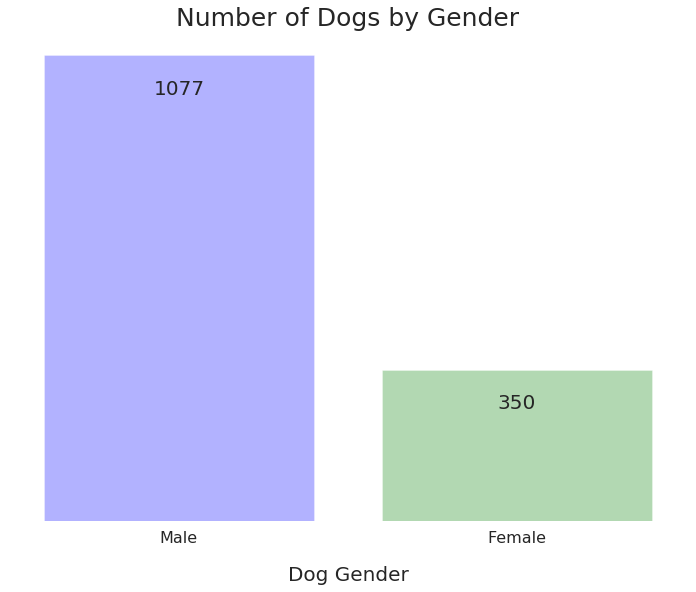

In [216]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# set plot title,labels..etc
plt.title('Number of Dogs by Gender',fontsize=25);
plt.xlabel('Dog Gender',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(visible=False);

# plot
bar1 = plt.bar(x=list(gender_counts.index), height=gender_counts.values,alpha=0.3,
                  color=['blue','green']);

# add text to plot
for rect in bar1:
    h = rect.get_height()
    loc = rect.get_x()+rect.get_width()/2.0
    plt.text(loc, h-100, '%d' % int(h), fontdict={'fontsize':20},
             ha='center', va='bottom');

    Observation:
    1. There are more 'Male' dogs than 'Female' dogs in our dataset.

### DOG STAGE

'Dog Stages' in our dataset represent how dogs are called in `Doggo Lingo`.


>DoggoLingo tends to operate in terms of free indirect discourse; the speaker is a human admiring (or mirin‚Äô) a dog, but the vocabulary is implied to be the dog‚Äôs own idiom. In keeping with old cultural beliefs about what goes on in the canine brain, the vocabulary of DoggoLingo is upbeat, joyful, and clueless in a relentlessly friendly way. (Inside of a dog it‚Äôs too dark to read? No way, Groucho ‚Äì inside of a dog we see nothing but light.)<br>- [Oxford Dictionary](https://blog.oxforddictionaries.com/2017/08/01/doggolingo/)

In various stages of growth, Dogs are called by different names. Some that are found in our dataset are
- **pupper** - younger dogs
- **puppo** - adolescent dogs
- **doggo** - mature dogs
- **floofer** - dogs with excess fur or old dogs

With this information, lets see the dog stages in our dataset.

In [217]:
df.dog_stage.value_counts()

pupper     234
doggo      75 
puppo      25 
floofer    10 
Name: dog_stage, dtype: int64

In [218]:
stages = df.dog_stage.value_counts()

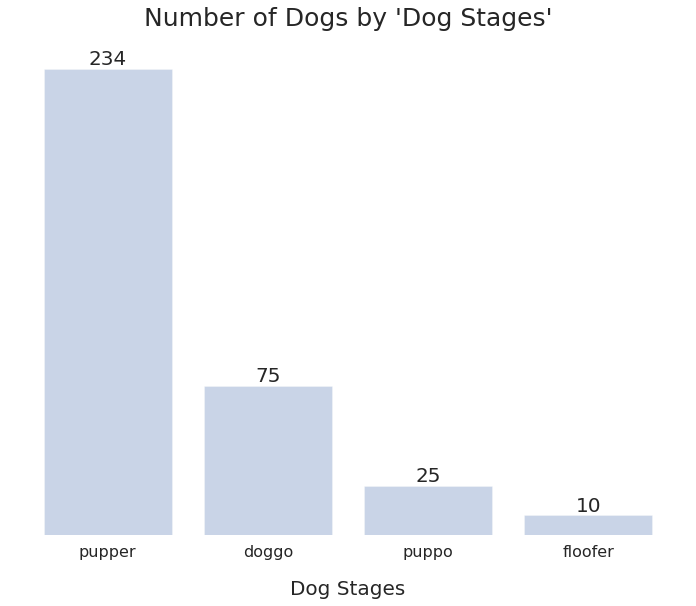

In [219]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False);
ax.spines['bottom'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

# set plot title,labels..etc
plt.title('Number of Dogs by \'Dog Stages\'',fontsize=25,pad=20);
plt.xlabel('Dog Stages',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(visible=False);

# plot
bar1 = plt.bar(x=list(stages.index), height=stages.values,alpha=0.3);

# add text to plot
for rect in bar1:
    h = rect.get_height()
    loc = rect.get_x()+rect.get_width()/2.0
    plt.text(loc, h, '%d' % int(h), fontdict={'fontsize':20},
             ha='center', va='bottom');

    Observation:
    1. Although less than 350 rows have dog stages, most of the dogs are `puppers`

### DOG NAME

Dog names are the names given to dogs. Its how they're called.

In [220]:
# get unique values count
df.dog_name.nunique()

1011

In [221]:
# get top 10
df.dog_name.value_counts()[:10]

Lucy       11
Charlie    11
Oliver     11
Cooper     10
Penny      9 
Tucker     9 
Lola       8 
Happy      8 
Sadie      8 
Winston    8 
Name: dog_name, dtype: int64

There are 1011 unique names and the most common or top 10 names are listed above. Remember that during **Data Wrangling**, we cleaned dog name for one dog which had name as 'Happy' but the tweet text did not have dog name. It had some wishes for occasion or celebration like *'Happy Christmas..etc'*.

We see that there are 8 rows with dog name as 'Happy'. Lets checkout.

In [222]:
df[df.dog_name=='Happy']['tweet_text']

220     Happy Saturday here's a dog in a mailbox. 12/10 https://t.co/MM7tb4HpEY                                                   
259     Happy Wednesday here's a pup wearing a beret. 12/10 please enjoy https://t.co/MXedEzSHIf                                  
288     Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                              
443     Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                             
1113    Happy Friday. Here's some golden puppers. 12/10 for all https://t.co/wNkqAED6lG                                           
1213    Happy New Year from the squad! 13/10 for all https://t.co/9njRxyUd5L                                                      
1316    This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v                  
2016    Happy New Year from your fav holiday squad! üéâ 12/10 for all\n\nHere's to

As doubted, only 1 dog has the name 'Happy'. Other texts do not have dog names. We will correct it by setting the values to None. We will set name for the 1 dog at index 1316 manually

In [223]:
# get index
a_index = df[df.dog_name=='Happy'].index

In [224]:
# set value
df.loc[a_index,'dog_name'] = None
df.loc[1316,'dog_name'] = 'Happy'

#### Test

In [225]:
# get top 10
df.dog_name.value_counts()[:10]

Oliver     11
Lucy       11
Charlie    11
Cooper     10
Tucker     9 
Penny      9 
Lola       8 
Sadie      8 
Winston    8 
Toby       7 
Name: dog_name, dtype: int64

With that being corrected, we will save the dataset.

In [226]:
# save dataset
df.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

We will also plot the top 10 names

In [227]:
# get top 10
top_names = df.dog_name.value_counts()[:10]

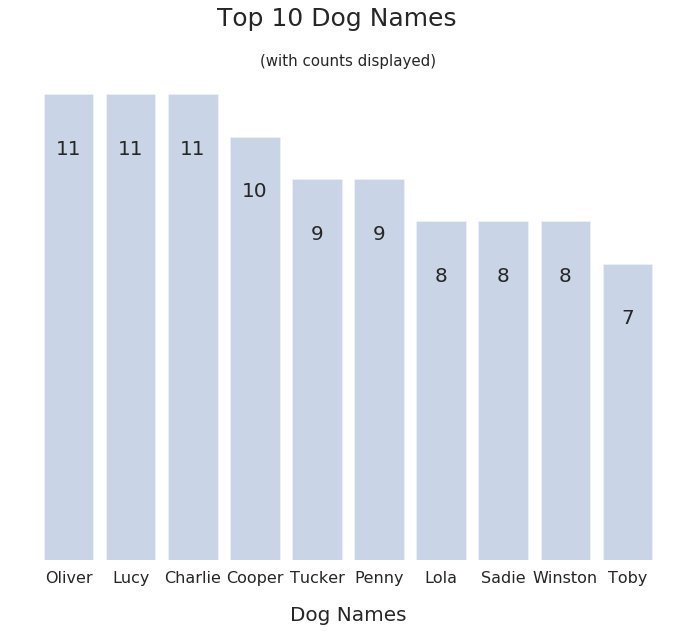

In [228]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# set plot title,labels..etc
plt.suptitle('Top 10 Dog Names', fontsize=25);
plt.title('(with counts displayed)', fontsize=15);
plt.xlabel('Dog Names',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(visible=False);

# plot
bar1 = plt.bar(x=list(top_names.index), height=top_names.values,alpha=0.3)

# add text to plot
for rect in bar1:
    h = rect.get_height()
    loc = rect.get_x()+rect.get_width()/2.0
    plt.text(loc, h-1.5, '%d' % int(h), fontdict={'fontsize':20},
             ha='center', va='bottom')

### RETWEETS

#### What is it?

>A Retweet is a re-posting of a Tweet. Twitter's Retweet feature helps you and others quickly share that Tweet with all of your followers. You can Retweet your own Tweets or Tweets from someone else.<br> -[Twitter FAQ](https://help.twitter.com/en/using-twitter/retweet-faqs)

The Retweet count shows how many times the particular Tweet was retweeted by others.

In [229]:
df.retweet_count.describe()

count   2174.000 
mean    2653.149 
std     4699.773 
min     0.000    
25%     574.250  
50%     1269.500 
75%     3038.750 
max     83899.000
Name: retweet_count, dtype: float64

In [230]:
df.retweet_count.quantile(0.99)

20312.87999999999

There seems to be a huge gap between 99% value and Max value. We will use 99% as our limit and analyze the dataset for those values

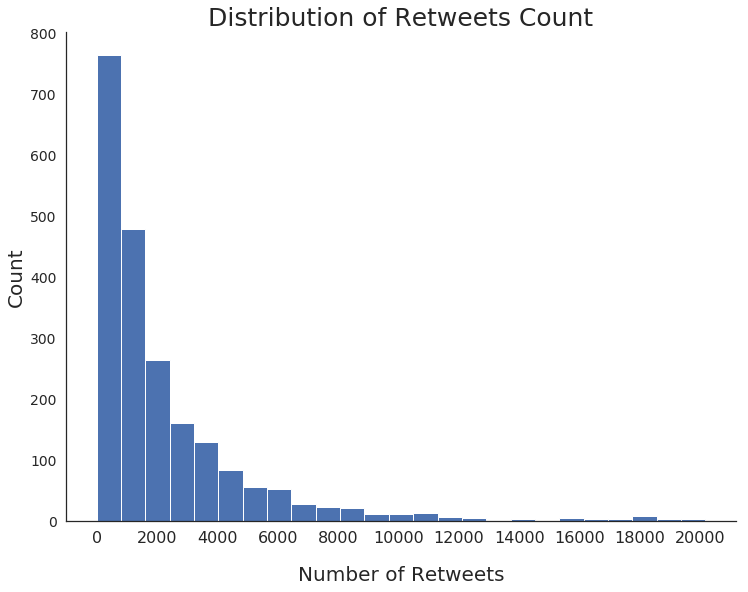

In [231]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# set plot title,labels..etc
plt.title('Distribution of Retweets Count',fontsize=25);
plt.xlabel('Number of Retweets',fontsize=20,labelpad=20);
plt.ylabel('Count',fontsize=20);
plt.xticks(range(0,21000,2000),fontsize=16);
plt.yticks(fontsize=14);

# plot
fig = plt.hist(df.loc[df.retweet_count<=20318,'retweet_count'],bins=25);

The distribution is skewed. Most Tweets are retweeted less than 2000 times(but that is still a huge number!)

### LIKES

>Likes are represented by a small heart and are used to show appreciation for a Tweet or a Moment.<br>-[Twitter FAQ](https://help.twitter.com/en/using-twitter/liking-tweets-and-moments)

Likes count in our dataset shows howmany times the particular Tweet was liked by others

In [232]:
df.likes_count.describe()

count   2174.000  
mean    8601.411  
std     12620.550 
min     51.000    
25%     1829.750  
50%     3882.500  
75%     10694.500 
max     164665.000
Name: likes_count, dtype: float64

In [233]:
df.likes_count.quantile(0.99)

55286.159999999996

Similar to Retweets, even in Likes, there is a huge gap between 99% and Maximum value. We will use 99% data for analysis

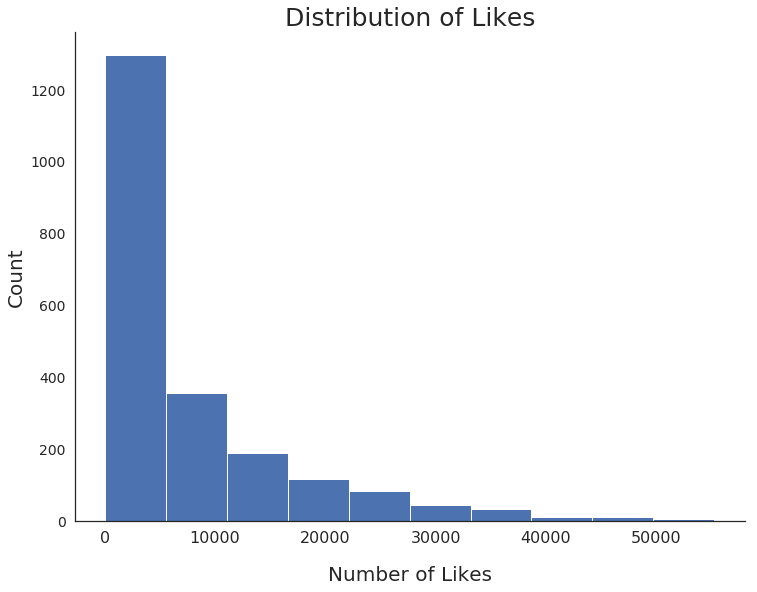

In [234]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

# set plot title,labels..etc
plt.title('Distribution of Likes',fontsize=25);
plt.xlabel('Number of Likes',fontsize=20,labelpad=20);
plt.ylabel('Count',fontsize=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

# plot
fig = plt.hist(df.loc[df.likes_count<=55312,'likes_count']);

The distribution is similar to Retweets. It is skewed right with more values in the lower end of the spectrum.

### DOG BREED

Every Tweet image in the Twitter archive for `WERATEDOGS` was passed through a neural network that can classify breeds of dogs and its outcome is what we have in the consolidated breed prediction and prediction confidence columns

In [235]:
# get top 10
df.dog_breed_prediction.value_counts()[:10]

Golden Retriever      158
Labrador Retriever    108
Pembroke              95 
Chihuahua             91 
Pug                   62 
Toy Poodle            51 
Chow                  48 
Pomeranian            42 
Samoyed               42 
Malamute              33 
Name: dog_breed_prediction, dtype: int64

In [236]:
top_breeds = df.dog_breed_prediction.value_counts()[:10]

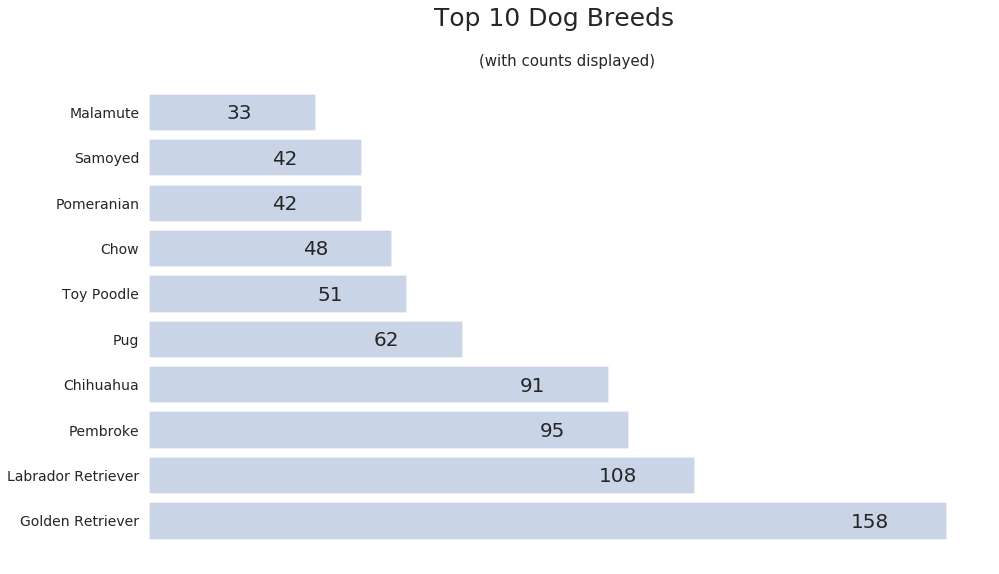

In [237]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(15,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# set plot title,labels..etc
plt.suptitle('Top 10 Dog Breeds',fontsize=25);
plt.title('(with counts displayed)',fontsize=15);
plt.xticks(visible=False);
plt.yticks(fontsize=14);

# plot
bar1 = plt.barh(y=list(top_breeds.index), width=top_breeds.values,alpha=0.3)

# add text to plot
for rect in bar1:
    w = rect.get_width()
    loc = rect.get_y()+rect.get_height()/5
    plt.text(w-15, loc, '%d' % int(w), fontdict={'fontsize':20},
             ha='center', va='bottom')

    Observation:
    1. The most common breed of dog found in the dataset is 'Golden Retriever'. Now who's a good doggo?!

### PREDICTION CONFIDENCE

This column shows how confident the algorithm is in its prediction

In [238]:
round(df.loc[df.dog_breed_prediction.notnull(),'prediction_confidence'],2).describe()

count   1686.000
mean    0.550   
std     0.299   
min     0.000   
25%     0.300   
50%     0.550   
75%     0.820   
max     1.000   
Name: prediction_confidence, dtype: float64

In [239]:
round(df.loc[df.dog_breed_prediction.notnull(),'prediction_confidence'],2).value_counts()

0.990    48
1.000    36
0.980    34
0.950    32
0.960    31
0.970    26
0.380    25
0.410    23
0.870    21
0.290    21
0.610    21
0.840    21
0.520    21
0.510    21
0.330    20
0.000    20
0.880    20
0.910    20
0.480    20
0.810    20
0.370    20
0.430    20
0.800    19
0.740    19
0.660    19
0.770    19
0.620    19
0.460    19
0.550    18
0.250    18
         ..
0.500    13
0.050    13
0.140    13
0.240    13
0.100    13
0.390    13
0.630    13
0.570    13
0.680    13
0.170    13
0.310    13
0.060    12
0.450    12
0.850    12
0.160    12
0.040    11
0.690    11
0.010    11
0.560    11
0.080    11
0.150    11
0.120    11
0.190    11
0.020    11
0.070    10
0.490    10
0.640    10
0.210    9 
0.230    8 
0.650    7 
Name: prediction_confidence, Length: 101, dtype: int64

Most predictions(around 48) have confidence as 0.99, followed by 36 predictions with confidence 1

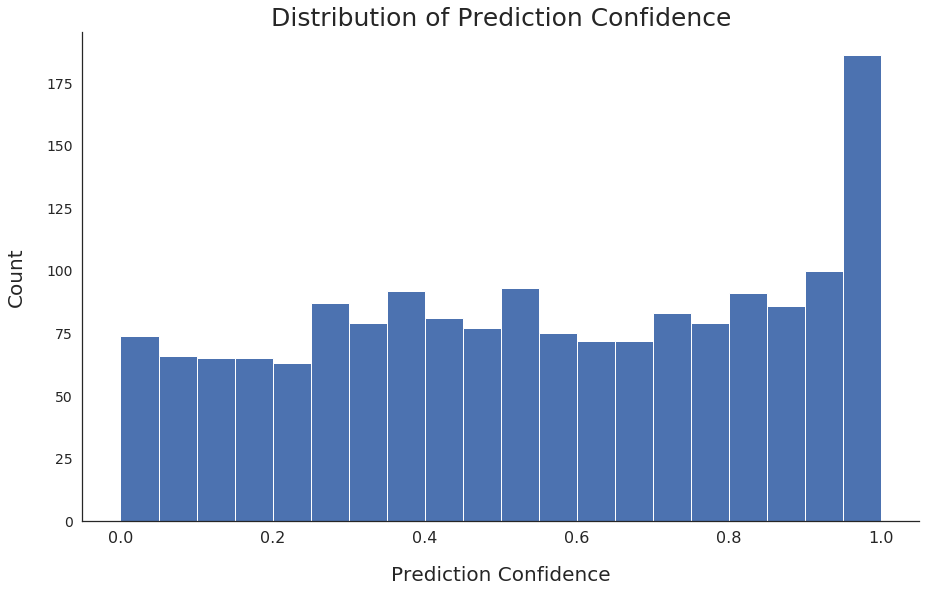

In [240]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(15,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set plot title,labels..etc
plt.title('Distribution of Prediction Confidence',fontsize=25);
plt.xlabel('Prediction Confidence',fontsize=20,labelpad=20);
plt.ylabel('Count',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

# plot
fig = plt.hist(df.loc[df.dog_breed_prediction.notnull(),'prediction_confidence'],
               bins=20);

### HASHTAG

the HashTag column has value if any **#HashTag** was specified in the Tweet text. Only 24 non-null values are available in the dataset which is not a very good number but we will still see how the tweets are tagged.

In [241]:
df.hashtag.value_counts()

BarkWeek                 9
PrideMonth               3
Canada150                1
FinalFur                 1
K9VeteransDay            1
dogsatpollingstations    1
PrideMonthPuppo          1
ScienceMarch             1
WKCDogShow               1
NoDaysOff                1
WomensMarch              1
notallpuppers            1
BellLetsTalk             1
ImWithThor               1
Name: hashtag, dtype: int64

In [242]:
# get counts
hashtags = df.hashtag.value_counts()

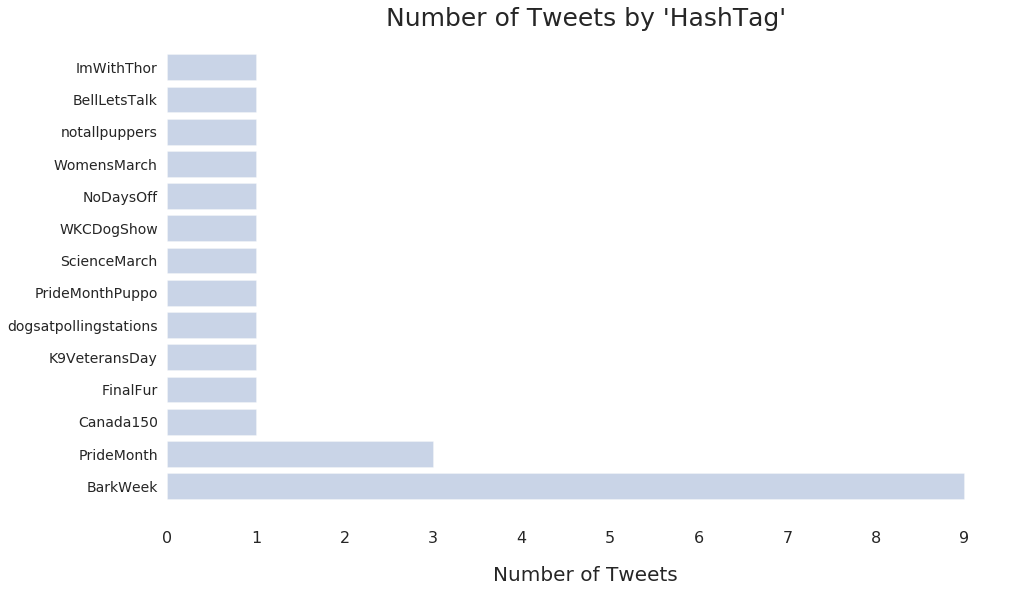

In [243]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(15,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# set plot title,labels..etc
plt.title('Number of Tweets by \'HashTag\'',fontsize=25);
plt.xlabel('Number of Tweets',fontsize=20,labelpad=20);
plt.xticks(range(0,10),fontsize=16);
plt.yticks(fontsize=14);

# plot
bar1 = plt.barh(y=list(hashtags.index), width=hashtags.values,alpha=0.3);


Most tweets with **#HashTag** is for **BarkWeek**.

### RATING

It is the rating given to doggo in the Tweet picture! 

Ratings are given in the format *numerator/denominator* with denominator mostly 10 and numerator almost always greater than 10. Why? **They're all good Dogs friend!**


In [244]:
df.rating_numerator.describe()

count   2175.000
mean    12.734  
std     43.156  
min     0.000   
25%     10.000  
50%     11.000  
75%     12.000  
max     1776.000
Name: rating_numerator, dtype: float64

In [245]:
df.rating_numerator.quantile(0.99)

14.0

99% ratings are below 15. the Maximum value however is 1776. We will limit to 99% dataset for analysis.

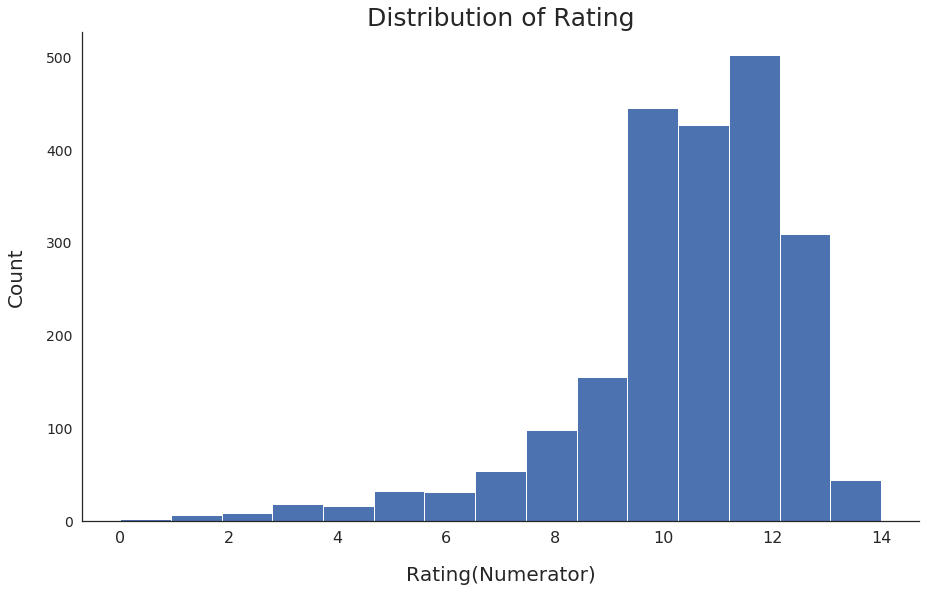

In [246]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(15,9));

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set plot title,labels..etc
plt.title('Distribution of Rating',fontsize=25);
plt.ylabel('Count',fontsize=20,labelpad=20);
plt.xlabel('Rating(Numerator)',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

# plot
fig = plt.hist(df.loc[df.rating_numerator<=14,'rating_numerator'],bins=15);

As expected, the distribuion is left skewed with most values in the upper end of the spectrum with the most common value - *12*

In [247]:
df.rating_denominator.describe()

count   2175.000
mean    10.399  
std     7.014   
min     1.000   
25%     10.000  
50%     10.000  
75%     10.000  
max     170.000 
Name: rating_denominator, dtype: float64

In [248]:
df.rating_denominator.quantile(0.99)

10.0

## BI-VARIATE ANALYSIS

We have seen single variables and their properties. Lets check how they relate to each other

### GENDER AND LIKES

Does gender influence the number of likes a dog gets?

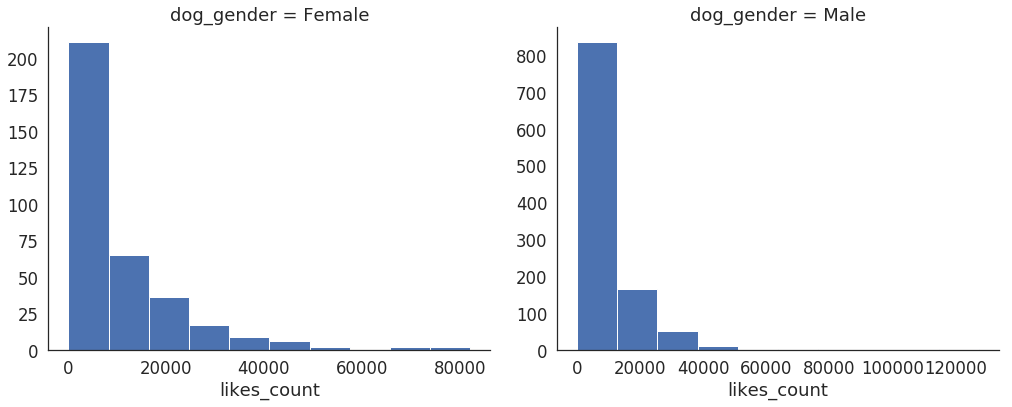

In [249]:
with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.FacetGrid(df,col='dog_gender',sharex=False,sharey=False, 
                      height=6,aspect=1.2);
    
    # plot histogram
    g.map(plt.hist,'likes_count');

We know that there are more 'Male' dogs in the dataset than 'Female' dogs. That is what we see represented in the y-axis. Lets check other descriptors.

In [250]:
df.groupby('dog_gender')['likes_count'].describe()

count      mean       std     min      25%      50%       75%  \
dog_gender                                                                    
Female     350.000  10587.380 12568.343 105.000 2738.000 5600.000 14398.750   
Male       1076.000 8753.968  11564.871 111.000 2122.250 4458.500 11495.000   

                  max  
dog_gender             
Female     82127.000   
Male       127368.000

Here we can see that 'Female' dogs have better values than 'Male' dogs at 25,50 and 75% intervals. I think we should plot to see it clearly.

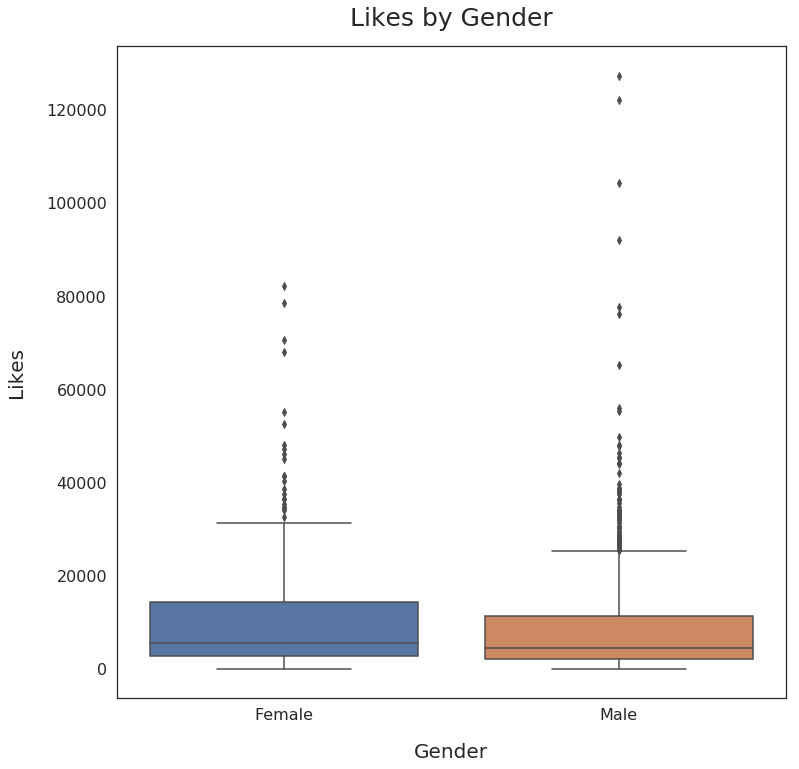

In [251]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.boxplot(data=df, x='dog_gender', y='likes_count');

# set plot title,labels..etc
fig.set_title('Likes by Gender',fontsize=25,pad=20);
fig.set_ylabel('Likes',fontsize=20,labelpad=20);
fig.set_xlabel('Gender',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

There are significant amount of outliers, we will concentrate on IQR values.

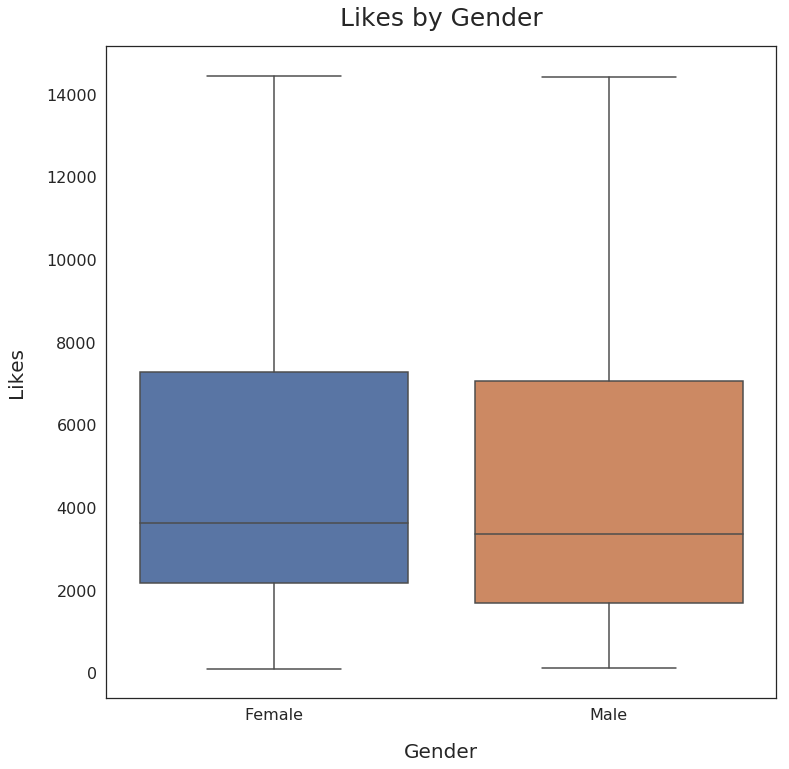

In [252]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.boxplot(data=df[df.likes_count<=14500],
                  x='dog_gender', y='likes_count');

# set plot title,labels..etc
fig.set_title('Likes by Gender',fontsize=25,pad=20);
fig.set_ylabel('Likes',fontsize=20,labelpad=20);
fig.set_xlabel('Gender',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

In [253]:
df.groupby('dog_gender')['likes_count'].quantile(0.99)

dog_gender
Female   61741.650
Male     47945.750
Name: likes_count, dtype: float64

Yes. Although the difference is not much, 'Female' dogs get a slight advantage

### RATING BY GENDER

We will check if dog ratings vary by dog gender

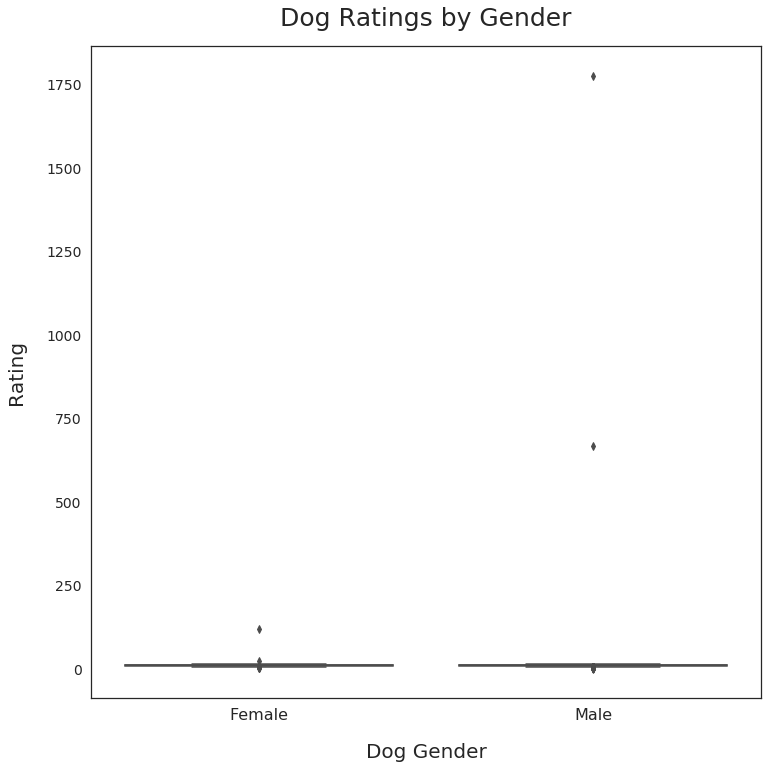

In [254]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.boxplot(df.dog_gender,df.rating_numerator);

# set plot title,labels..etc
fig.set_title('Dog Ratings by Gender',fontsize=25,pad=20);
fig.set_xlabel('Dog Gender',fontsize=20,labelpad=20);
fig.set_ylabel('Rating',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

We see that the plot is not clear due to outliers. We'll remove outliers and concentrate on IQR which is what we are interested in

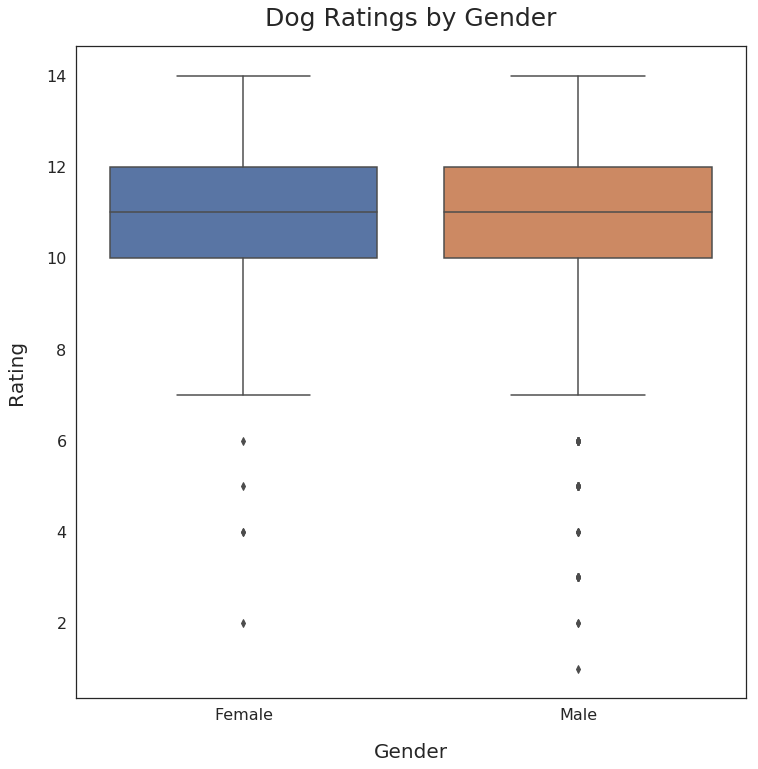

In [255]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.boxplot(data=df[df.rating_numerator<20],
            x='dog_gender',y='rating_numerator');

# set plot title,labels..etc
fig.set_title('Dog Ratings by Gender',fontsize=25,pad=20);
fig.set_ylabel('Rating',fontsize=20,labelpad=20);
fig.set_xlabel('Gender',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

In [256]:
df.groupby('dog_gender')['rating_numerator'].describe()

count   mean    std   min    25%    50%    75%      max
dog_gender                                                           
Female     350.000  11.562 6.114  2.000 10.000 11.000 12.000 121.000 
Male       1077.000 12.826 57.401 1.000 10.000 11.000 12.000 1776.000

    Observation:
    1. From the boxplot, we find that gender has less influence in rating, since both genders have similar    characteristics.

### RATING BY 'DOG STAGE'

Does 'Stage' influence the ratings given? We all love a cute *pupper*! who doesn't!

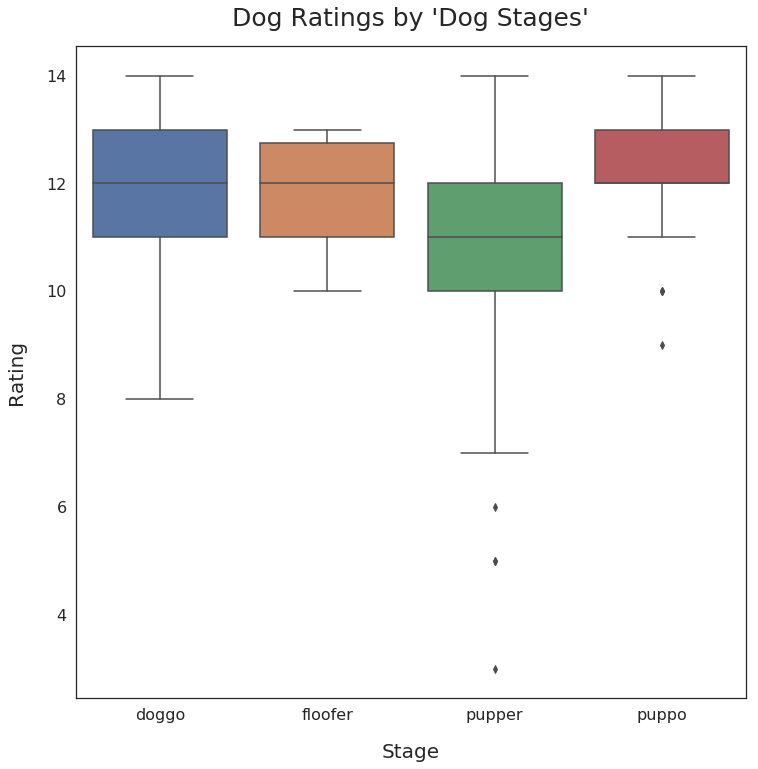

In [257]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.boxplot(data=df,
                  x='dog_stage',y='rating_numerator');

# set plot title,labels..etc
fig.set_title('Dog Ratings by \'Dog Stages\'',fontsize=25,pad=20);
fig.set_ylabel('Rating',fontsize=20,labelpad=20);
fig.set_xlabel('Stage',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

The plot is interesting. We were expecting **puppies** to get better ratings than older dogs. But *doggos* have better ratings than *puppers* in this dataset.

In [258]:
df.groupby('dog_stage')['rating_numerator'].describe()

count   mean   std    min    25%    50%    75%    max
dog_stage                                                        
doggo     75.000  11.853 1.430 8.000  11.000 12.000 13.000 14.000
floofer   10.000  11.800 1.033 10.000 11.000 12.000 12.750 13.000
pupper    234.000 10.753 1.733 3.000  10.000 11.000 12.000 14.000
puppo     25.000  12.080 1.256 9.000  12.000 12.000 13.000 14.000

    Observation:
    1. Want better rating. Get a `Doggo`!

### RATING AND LIKES

Good ratings usually mean, the picture is good. There must be relationship between likes and rating. Lets check

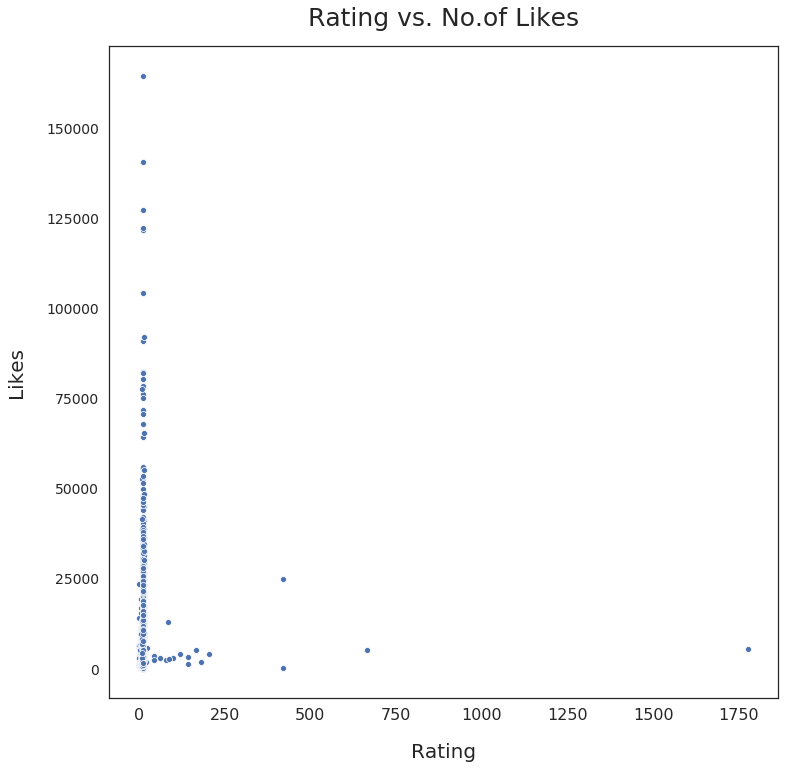

In [259]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.scatterplot(data=df,
                      x='rating_numerator',y='likes_count');

# set plot title,labels..etc
plt.title('Rating vs. No.of Likes',fontsize=25,pad=20);
plt.ylabel('Likes',fontsize=20,labelpad=20);
plt.xlabel('Rating',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

Again, the plot is surprising. Looks like the relationship is not that strong! we can even presume there is no relationship here.

Hmm..what if we check for 99% rating instead of all ratings? Lets see

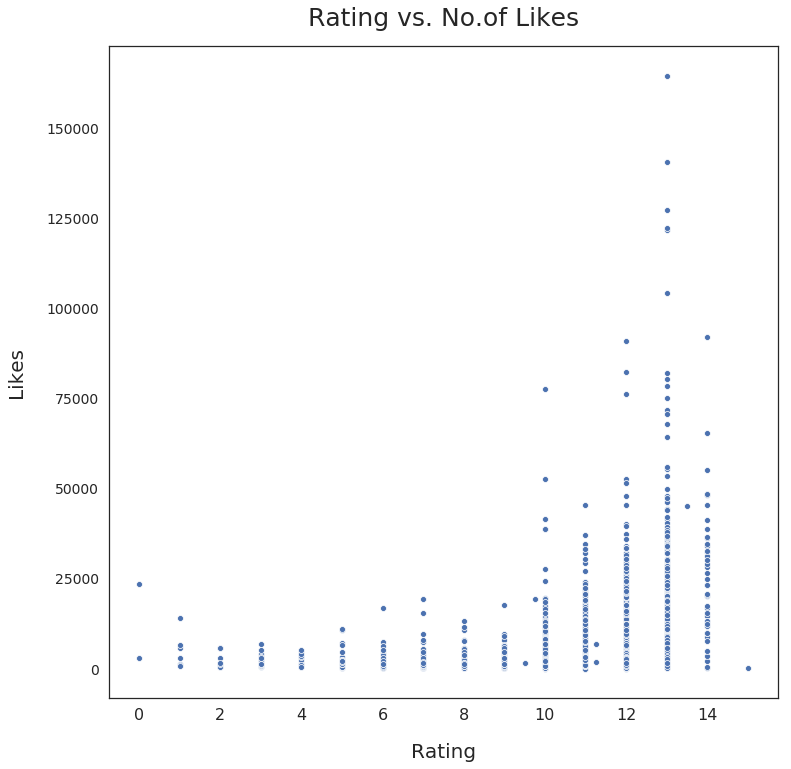

In [260]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.scatterplot(data=df[df.rating_numerator<20],
                      x='rating_numerator',y='likes_count');

# set plot title,labels..etc
plt.title('Rating vs. No.of Likes',fontsize=25,pad=20);
plt.ylabel('Likes',fontsize=20,labelpad=20);
plt.xlabel('Rating',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

Ah! now we can see some pattern. Although not strong, there seems to be a relationship between rating and likes. There is a **weak positive correlation** between rating and likes. Lets calculate correlation and find out if this is true.

#### WITH OUTLIERS

In [261]:
rating = df.loc[df.likes_count.notnull(),'rating_numerator']
likes = df.loc[df.likes_count.notnull(),'likes_count']

# calculate pearson's correlation
stat.pearsonr(rating,likes)

(0.009525448745059058, 0.6571222198194941)

When we calculate correlation for dataset with all rating values

    Pearson's r = 0.00953
              p = 0.65681

#### WITHOUT OUTLIERS
What we will do now, is that we will filter the dataset for 99% rating values and check correlation.

In [262]:
rating = df.loc[(df.rating_numerator<20) &
                (df.likes_count.notnull()),
                'rating_numerator']
likes = df.loc[(df.rating_numerator<20) & 
               (df.likes_count.notnull()),
               'likes_count']

# calculate pearson's correlation
stat.pearsonr(rating,likes)

(0.3761047292927029, 2.264167097712275e-73)

In [263]:
format(2.2125073488121478e-73,'0.8f')

'0.00000000'

It is clear now. The result from calculation is

    Pearson's r = 0.37613
              p = 0.00000

The results are statistically significant! There is **weak positive correlation** between rating and likes.

### RATING BY RETWEETS

Do Tweets with good ratings get more Retweets? Lets answer that question!

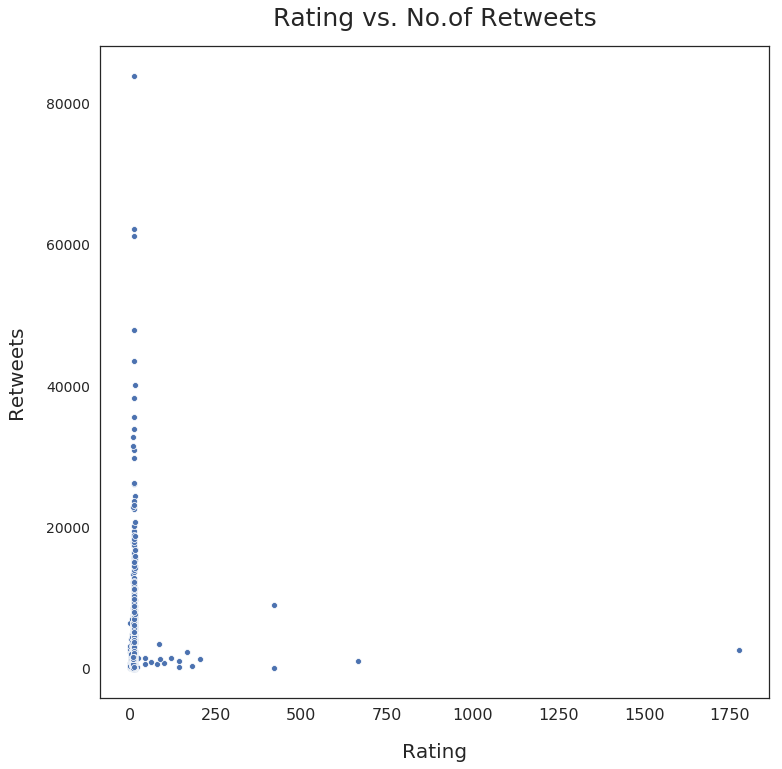

In [264]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.scatterplot(data=df,
                  x=df.rating_numerator,y=df.retweet_count);

# set plot title,labels..etc
plt.title('Rating vs. No.of Retweets',fontsize=25,pad=20);
plt.ylabel('Retweets',fontsize=20,labelpad=20);
plt.xlabel('Rating',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

The plot is similar to 'Likes'. We will follow the same procedure.

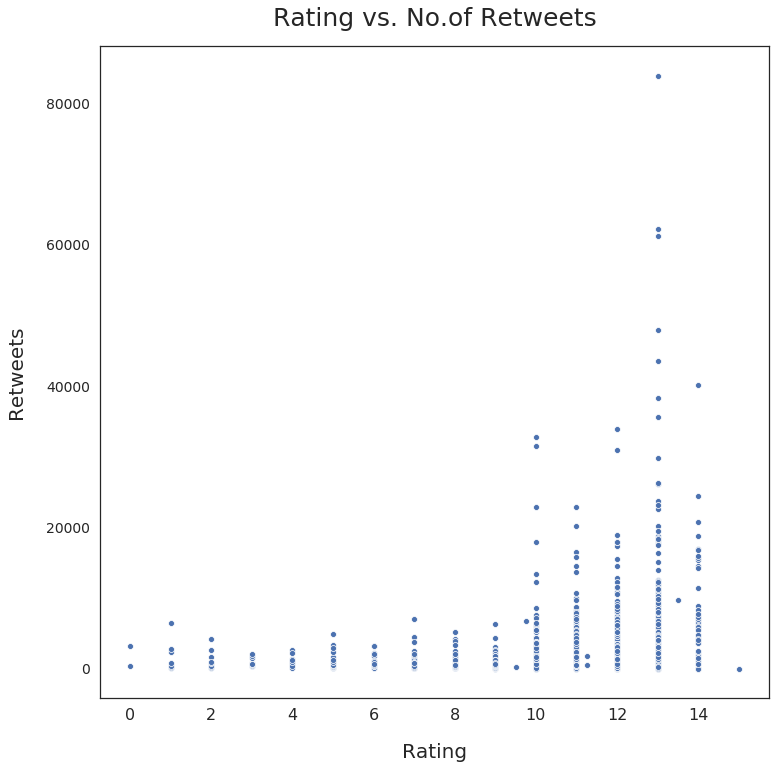

In [265]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
fig = sns.scatterplot(data=df[df.rating_numerator<20],
                  x='rating_numerator',y='retweet_count');

# set plot title,labels..etc
plt.title('Rating vs. No.of Retweets',fontsize=25,pad=20);
plt.ylabel('Retweets',fontsize=20,labelpad=20);
plt.xlabel('Rating',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

Hmm, even this plot looks similar to 'Likes' plot. We will also calculate correlation coefficient.

##### WITH OUTLIERS

In [266]:
rating = df.loc[df.retweet_count.notnull(),'rating_numerator']
retweets = df.loc[df.retweet_count.notnull(),'retweet_count']

# calculate pearson's correlation
stat.pearsonr(rating,retweets)

(0.011252036512937057, 0.6000321619237172)

##### WITHOUT OUTLIERS

In [267]:
rating = df.loc[(df.rating_numerator<20) &
                (df.retweet_count.notnull()),
                'rating_numerator']
retweets = df.loc[(df.rating_numerator<20) & 
               (df.retweet_count.notnull()),
               'retweet_count']

# calculate pearson's correlation
stat.pearsonr(rating,retweets)

(0.2883327086898317, 1.565500179360463e-42)

In [268]:
format(1.5571211996591263e-42,'0.8f')

'0.00000000'

Similar to 'Likes', the outcome of correlation without outliers is

    Pearson's r = 0.28834
              p = 0.00000

The result is statistically significant, but the relationship is not as strong as 'Likes'

### LIKES AND RETWEETS

As we have already observed in our plotting, 'Likes' and 'Retweets' have many similarities. There should be **high correlation** between the 2 columns. We need to check and find out.

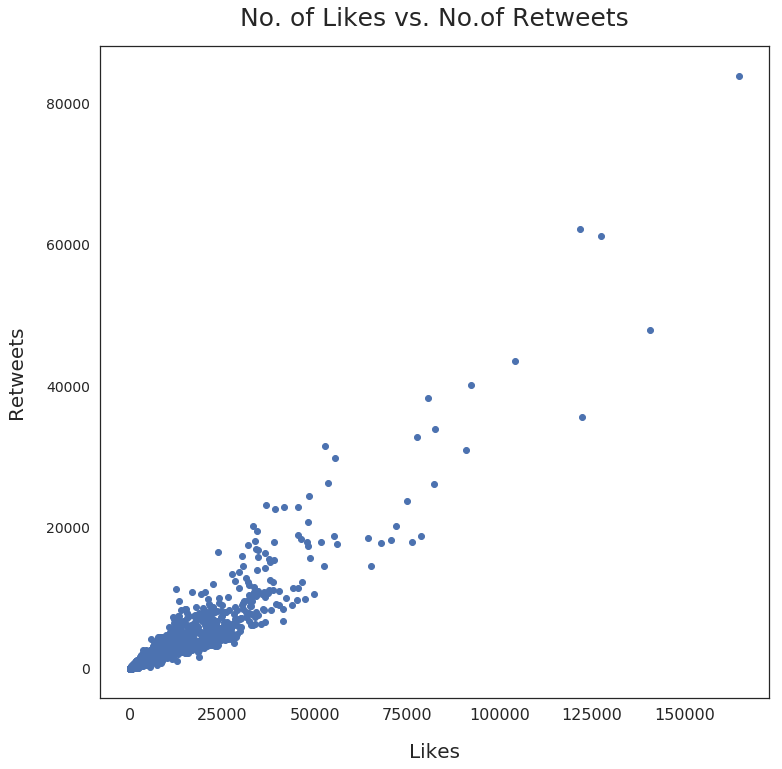

In [269]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(12,12));

# plot
ax.scatter(x=df.likes_count,y=df.retweet_count);

# set plot title,labels..etc
plt.title('No. of Likes vs. No.of Retweets',fontsize=25,pad=20);
plt.ylabel('Retweets',fontsize=20,labelpad=20);
plt.xlabel('Likes',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

Yes! we can visually see that with increasing likes, retweets increase. Lets also plot the regression line.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


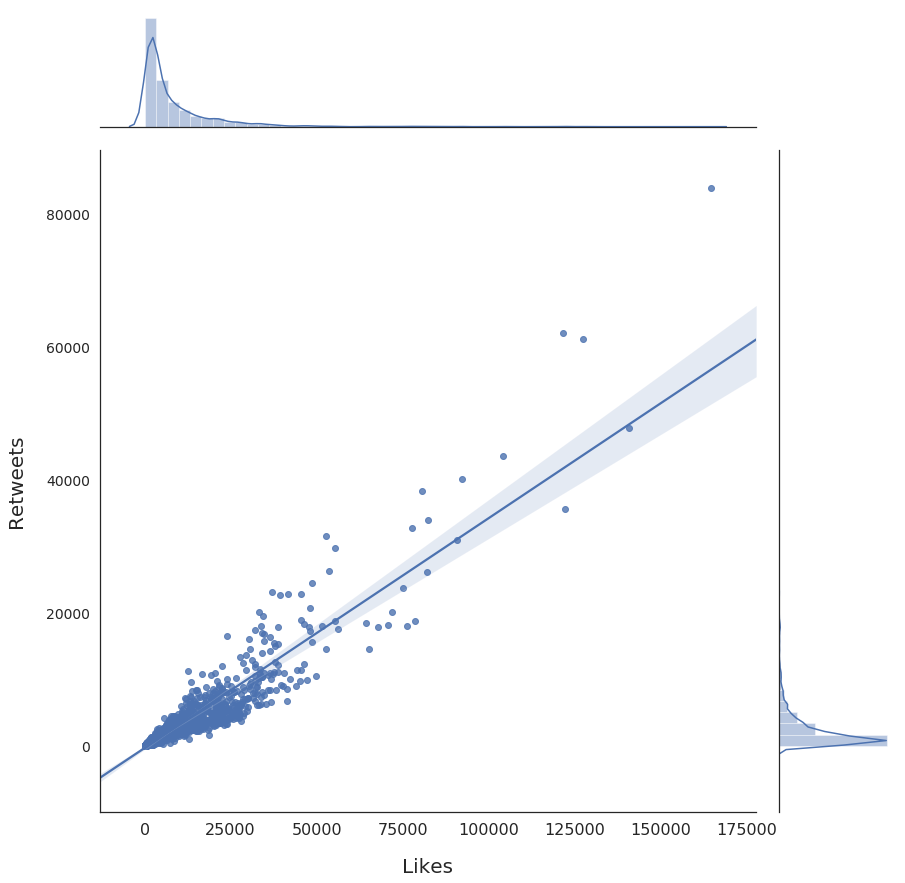

In [270]:
# plot
fig = sns.jointplot(data=df, height=12,
                    x = 'likes_count',
                    y = 'retweet_count',kind='reg');

# set plot title,labels..etc
plt.ylabel('Retweets',fontsize=20,labelpad=20);
plt.xlabel('Likes',fontsize=20,labelpad=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=14);

Lets also calculate correlation coefficient

In [271]:
likes = df[df.likes_count.notnull()]['likes_count']
retweets = df[df.retweet_count.notnull()]['retweet_count']

# calculate pearson's correlation
stat.pearsonr(likes,retweets)

(0.9276761692213316, 0.0)

    With r~0.93 and p=0.0, the result is statistically significant showing that there is strong relationship between likes and retweets

### RATING AND TWEET DATE

How do ratings vary by month? by year?

In [272]:
df_new = df.loc[df.rating_numerator<20,['tweet_date','rating_numerator']]

#### BY MONTH

In [273]:
df_new.groupby(df_new.tweet_date.dt.month).describe()

rating_numerator                                               
                      count   mean   std   min    25%    50%    75%    max
tweet_date                                                                
1          261.000          10.797 1.963 3.000 10.000 11.000 12.000 14.000
2          195.000          10.800 2.179 0.000 10.000 11.000 12.000 14.000
3          189.000          11.106 1.851 3.000 10.000 12.000 12.000 15.000
4          107.000          11.439 1.632 3.000 11.000 12.000 13.000 14.000
5          104.000          11.712 1.492 6.000 11.000 12.000 13.000 14.000
6          144.000          11.160 1.995 0.000 10.000 12.000 13.000 14.000
7          148.000          11.584 1.661 4.000 11.000 12.000 13.000 14.000
8          65.000           11.077 1.584 4.000 10.000 11.000 12.000 14.000
9          69.000           11.250 1.621 3.000 11.000 11.000 12.000 14.000
10         73.000           11.750 0.932 9.750 11.000 12.000 12.000 14.000
11         357.000          9.429  2.514 1.000 8.000  10.000 11.000 14.000
12         444.000          9.923  2.297 1.000 9.000  10.000 11.445 14.000

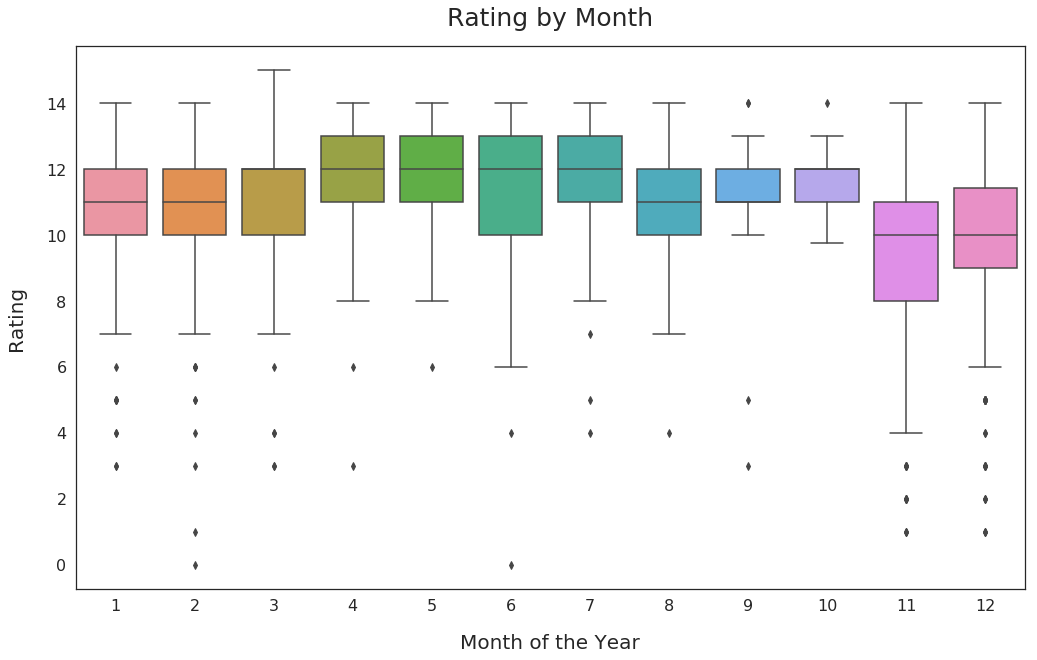

In [274]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(17,10));

# plot
fig = sns.boxplot(df_new.tweet_date.dt.month,y=df_new.rating_numerator);

# set plot title,labels..etc
plt.title('Rating by Month',fontsize=25,pad=20);
fig.set_ylabel('Rating',fontsize=20,labelpad=20);
fig.set_xlabel('Month of the Year',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

The months April, May, June and July seem to have higher ratings on average than other months! doggo's do enjoy a cool summer I guess! :D

#### BY YEAR

In [275]:
df_new.groupby(df_new.tweet_date.dt.year).describe()

rating_numerator                                               
                      count   mean   std   min    25%    50%    75%    max
tweet_date                                                                
2015       685.000          9.321  2.376 1.000 8.000  10.000 11.000 13.000
2016       1076.000         10.798 1.798 0.000 10.000 11.000 12.000 14.000
2017       395.000          12.427 1.148 0.000 12.000 13.000 13.000 15.000

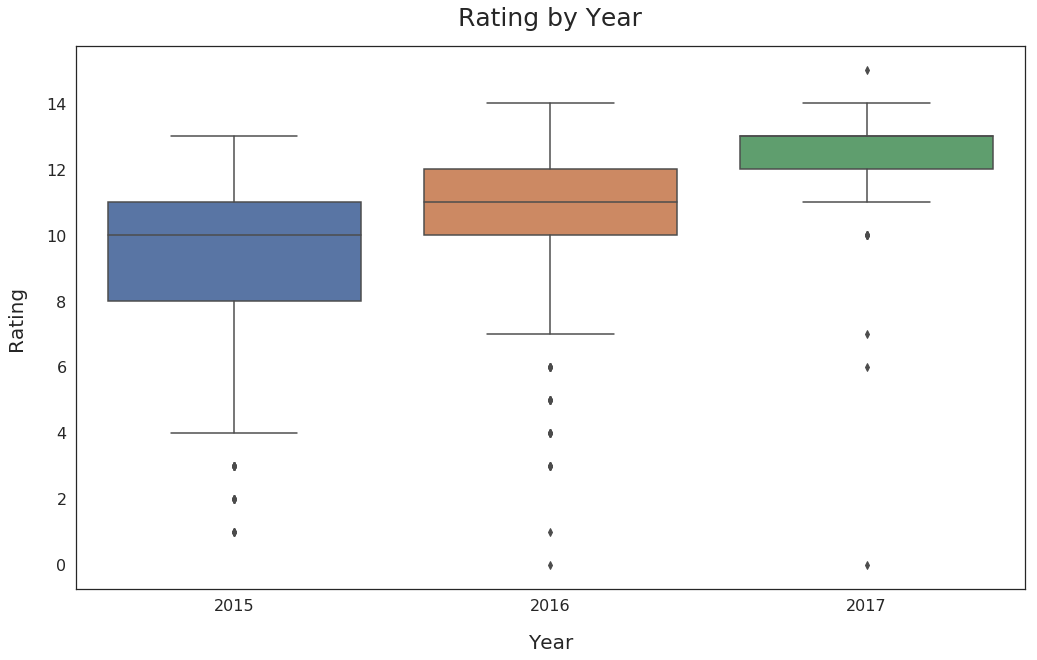

In [276]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(17,10));

# plot
fig = sns.boxplot(df_new.tweet_date.dt.year,y=df_new.rating_numerator);

# set plot title,labels..etc
plt.title('Rating by Year',fontsize=25,pad=20);
fig.set_ylabel('Rating',fontsize=20,labelpad=20);
fig.set_xlabel('Year',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

There is increase in ratings with increase in year. Seriously?! Good work guys, good work!!

### RATING AND BREED

Does a particular dog breed get more ratings on average? 

In [277]:
df.groupby('dog_breed_prediction')['rating_numerator'].describe()

count   mean    std    min    25%    50%  \
dog_breed_prediction                                                       
Afghan Hound                   3.000  9.667  5.774  3.000  8.000  13.000   
Airedale                       12.000 9.833  2.250  6.000  9.250  10.500   
American Staffordshire Terrier 16.000 10.312 3.071  0.000  10.000 11.000   
Appenzeller                    2.000  11.000 2.828  9.000  10.000 11.000   
Australian Terrier             2.000  11.500 2.121  10.000 10.750 11.500   
Basenji                        9.000  10.333 1.118  8.000  10.000 10.000   
Basset                         17.000 10.706 2.201  5.000  10.000 11.000   
Beagle                         20.000 10.150 1.531  6.000  9.750  10.000   
Bedlington Terrier             6.000  10.333 3.141  6.000  8.250  10.500   
Bernese Mountain Dog           11.000 11.273 1.104  10.000 10.000 12.000   
Black-And-Tan Coonhound        2.000  10.500 4.950  7.000  8.750  10.500   
Blenheim Spaniel               10.000 11.100 1.101  9.000  10.250 11.500   
Bloodhound                     7.000  11.143 1.864  9.000  10.000 10.000   
Bluetick                       4.000  10.500 1.915  8.000  9.500  11.000   
Border Collie                  12.000 10.583 2.503  4.000  9.750  11.500   
Border Terrier                 7.000  12.143 0.690  11.000 12.000 12.000   
Borzoi                         11.000 13.545 10.652 7.000  9.500  11.000   
Boston Bull                    12.000 9.417  2.109  5.000  8.750  10.000   
Bouvier Des Flandres           1.000  13.000 nan    13.000 13.000 13.000   
Boxer                          11.000 10.545 1.572  8.000  10.000 10.000   
Brabancon Griffon              3.000  10.000 0.000  10.000 10.000 10.000   
Briard                         3.000  12.333 0.577  12.000 12.000 12.000   
Brittany Spaniel               8.000  10.375 1.685  7.000  9.750  11.000   
Bull Mastiff                   5.000  10.400 1.140  9.000  10.000 10.000   
Cairn                          3.000  11.000 1.000  10.000 10.500 11.000   
Cardigan                       21.000 11.143 1.590  7.000  10.000 11.000   
Chesapeake Bay Retriever       31.000 10.839 1.440  8.000  10.000 10.000   
Chihuahua                      91.000 10.516 2.084  3.000  10.000 11.000   
Chow                           48.000 14.167 19.186 7.000  11.000 12.000   
Clumber                        1.000  11.270 nan    11.270 11.270 11.270   
...                               ...    ...    ...   ...     ...    ...   
Redbone                        6.000  9.667  2.251  7.000  7.750  10.000   
Rhodesian Ridgeback            4.000  9.750  2.630  6.000  9.000  10.500   
Rottweiler                     19.000 11.105 1.761  7.000  10.000 12.000   
Saint Bernard                  7.000  9.857  1.574  7.000  9.500  10.000   
Saluki                         4.000  12.500 1.000  11.000 12.500 13.000   
Samoyed                        42.000 11.690 1.352  7.000  11.000 12.000   
Schipperke                     13.000 10.923 1.382  8.000  10.000 11.000   
Scotch Terrier                 1.000  9.000  nan    9.000  9.000  9.000    
Scottish Deerhound             4.000  9.750  1.708  8.000  8.750  9.500    
Shetland Sheepdog              19.000 10.526 1.775  7.000  9.500  11.000   
Shih-Tzu                       20.000 10.350 1.309  8.000  9.750  10.500   
Siberian Husky                 20.000 11.300 1.129  9.000  10.750 11.000   
Silky Terrier                  1.000  12.000 nan    12.000 12.000 12.000   
Soft-Coated Wheaten Terrier    15.000 20.800 33.411 3.000  7.000  10.000   
Staffordshire Bullterrier      21.000 10.762 1.375  8.000  10.000 11.000   
Standard Poodle                11.000 10.727 1.679  9.000  9.500  10.000   
Standard Schnauzer             1.000  12.000 nan    12.000 12.000 12.000   
Sussex Spaniel                 2.000  11.000 0.000  11.000 11.000 11.000   
Tibetan Mastiff                4.000  12.250 0.500  12.000 12.000 12.000   
Tibetan Terrier                4.000  9.250  2.062  7.000  8.500  9.000    
Toy 

For our calculation, we will select the Median rating, since it represents a fair estimate than the Mean.

In [278]:
pred_rating = df.groupby('dog_breed_prediction')['rating_numerator'].quantile(0.50)

In [279]:
pred_rating.sort_values(ascending=False,inplace=True)

#### TOP 10

In [280]:
pred_rating[:10]

dog_breed_prediction
Afghan Hound            13.000
Bouvier Des Flandres    13.000
Saluki                  13.000
Rottweiler              12.000
Irish Water Spaniel     12.000
Flat-Coated Retriever   12.000
Pekinese                12.000
Pembroke                12.000
Eskimo Dog              12.000
Norfolk Terrier         12.000
Name: rating_numerator, dtype: float64

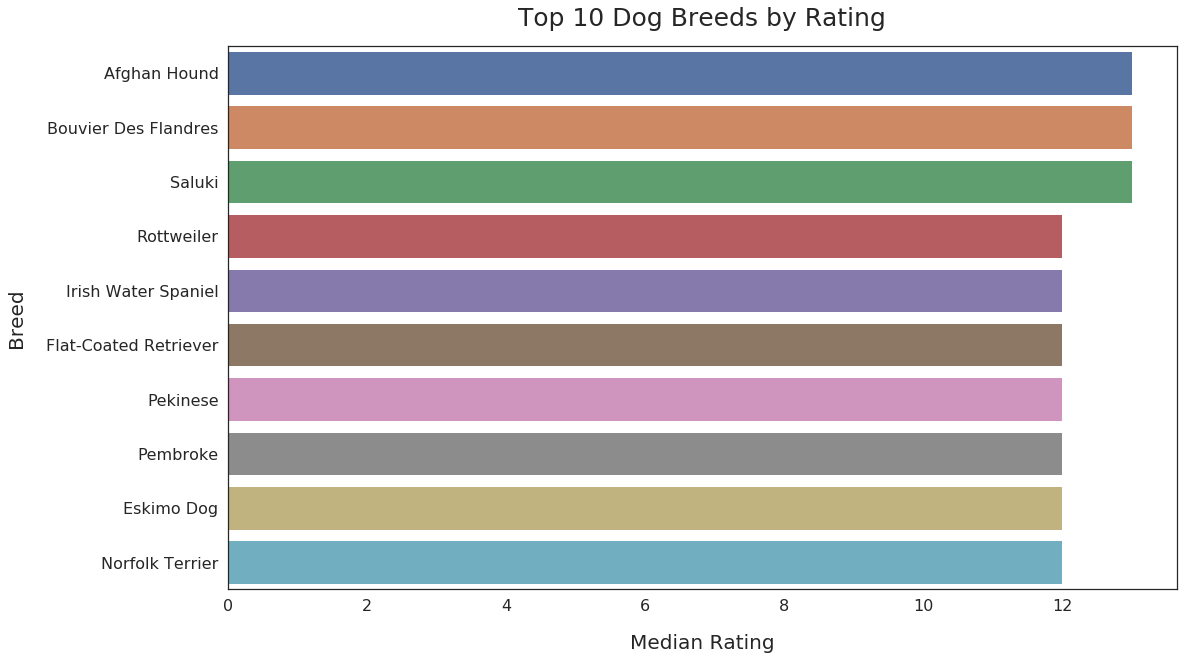

In [281]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(17,10));

# plot
fig = sns.barplot(x=pred_rating[:10].values,y=pred_rating[:10].index);

# set plot title,labels..etc
fig.set_title('Top 10 Dog Breeds by Rating',fontsize=25,pad=20);
fig.set_ylabel('Breed',fontsize=20,labelpad=20);
fig.set_xlabel('Median Rating',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

Are you planning to get a dog? get one of these!

#### BOTTOM 10

In [282]:
pred_rating[-10:]

dog_breed_prediction
Ibizan Hound             10.000
Welsh Springer Spaniel   9.500 
Dalmatian                9.500 
English Setter           9.500 
Scottish Deerhound       9.500 
Yorkshire Terrier        9.500 
Curly-Coated Retriever   9.000 
Scotch Terrier           9.000 
Tibetan Terrier          9.000 
Japanese Spaniel         5.000 
Name: rating_numerator, dtype: float64

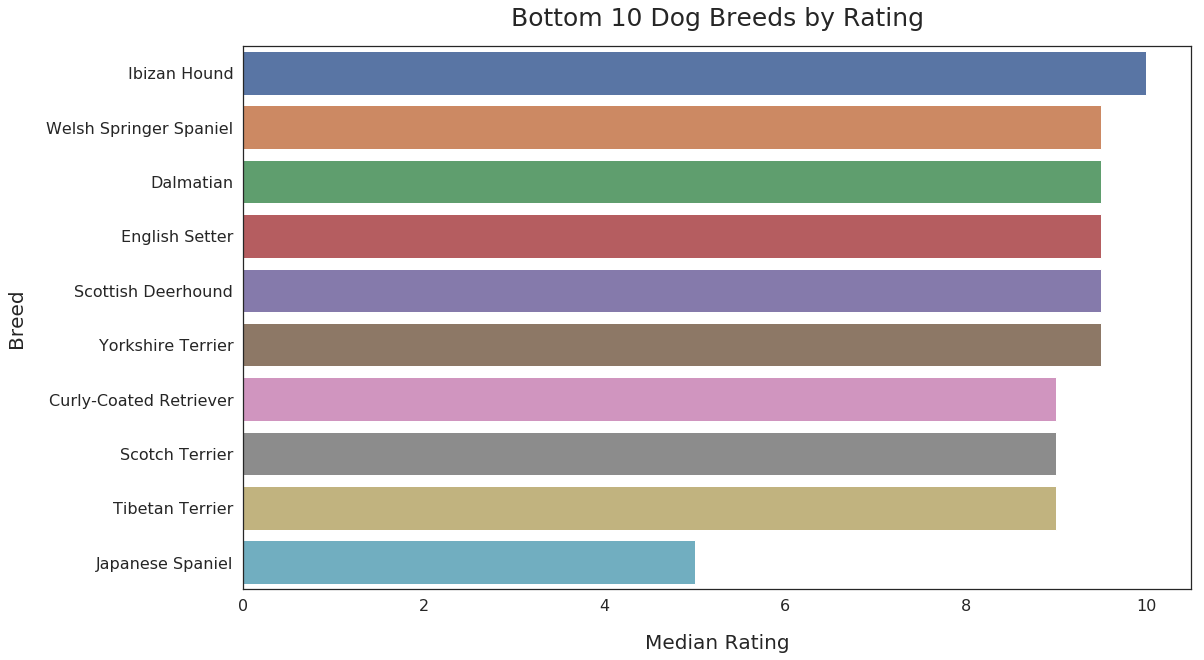

In [283]:
# set plot size
fig,ax = plt.subplots(1,1,figsize=(17,10));

# plot
fig = sns.barplot(x=pred_rating[-10:].values,y=pred_rating[-10:].index);

# set plot title,labels..etc
fig.set_title('Bottom 10 Dog Breeds by Rating',fontsize=25,pad=20);
fig.set_ylabel('Breed',fontsize=20,labelpad=20);
fig.set_xlabel('Median Rating',fontsize=20,labelpad=20);
fig.tick_params(labelsize=16);

These are dogs with low median rating score. I'm surprised to see 3 breeds of 'Terriers' in this list. Maybe they're all *not so* good dogs Brent!...Just kidding!

### BREED AND PREDICTION CONFIDENCE

Is it easy to predict some dog breeds than others? We'll see which dog breeds have high confidence value

In [284]:
df.groupby('dog_breed_prediction')['prediction_confidence'].describe()

count  mean   std   min   25%   50%   75%  \
dog_breed_prediction                                                        
Afghan Hound                   3.000  0.434 0.414 0.124 0.199 0.275 0.589   
Airedale                       12.000 0.584 0.246 0.169 0.447 0.539 0.807   
American Staffordshire Terrier 16.000 0.527 0.327 0.013 0.255 0.546 0.836   
Appenzeller                    2.000  0.504 0.229 0.342 0.423 0.504 0.585   
Australian Terrier             2.000  0.308 0.142 0.207 0.257 0.308 0.358   
Basenji                        9.000  0.420 0.324 0.055 0.183 0.344 0.749   
Basset                         17.000 0.522 0.324 0.000 0.320 0.556 0.814   
Beagle                         20.000 0.489 0.321 0.000 0.309 0.433 0.723   
Bedlington Terrier             6.000  0.286 0.141 0.015 0.287 0.311 0.378   
Bernese Mountain Dog           11.000 0.767 0.200 0.415 0.617 0.788 0.963   
Black-And-Tan Coonhound        2.000  0.692 0.230 0.529 0.611 0.692 0.773   
Blenheim Spaniel               10.000 0.700 0.333 0.114 0.399 0.915 0.952   
Bloodhound                     7.000  0.504 0.270 0.186 0.288 0.529 0.677   
Bluetick                       4.000  0.408 0.291 0.175 0.245 0.314 0.477   
Border Collie                  12.000 0.577 0.157 0.281 0.459 0.591 0.664   
Border Terrier                 7.000  0.464 0.177 0.156 0.375 0.482 0.599   
Borzoi                         11.000 0.516 0.319 0.027 0.287 0.565 0.797   
Boston Bull                    12.000 0.512 0.333 0.087 0.245 0.369 0.805   
Bouvier Des Flandres           1.000  0.083 nan   0.083 0.083 0.083 0.083   
Boxer                          11.000 0.638 0.247 0.197 0.499 0.655 0.833   
Brabancon Griffon              3.000  0.370 0.138 0.217 0.313 0.410 0.447   
Briard                         3.000  0.619 0.322 0.369 0.437 0.504 0.744   
Brittany Spaniel               8.000  0.776 0.291 0.083 0.782 0.876 0.935   
Bull Mastiff                   5.000  0.816 0.155 0.669 0.701 0.744 0.976   
Cairn                          3.000  0.262 0.068 0.204 0.225 0.245 0.291   
Cardigan                       21.000 0.487 0.280 0.044 0.230 0.567 0.700   
Chesapeake Bay Retriever       31.000 0.430 0.291 0.004 0.178 0.382 0.699   
Chihuahua                      91.000 0.523 0.295 0.001 0.290 0.505 0.765   
Chow                           48.000 0.537 0.326 0.002 0.264 0.523 0.811   
Clumber                        1.000  0.947 nan   0.947 0.947 0.947 0.947   
...                               ...   ...   ...   ...   ...   ...   ...   
Redbone                        6.000  0.491 0.207 0.244 0.402 0.473 0.501   
Rhodesian Ridgeback            4.000  0.504 0.270 0.253 0.369 0.438 0.573   
Rottweiler                     19.000 0.518 0.278 0.062 0.336 0.502 0.721   
Saint Bernard                  7.000  0.558 0.338 0.094 0.362 0.482 0.804   
Saluki                         4.000  0.523 0.036 0.484 0.504 0.519 0.539   
Samoyed                        42.000 0.717 0.297 0.048 0.471 0.902 0.979   
Schipperke                     13.000 0.445 0.361 0.012 0.122 0.363 0.746   
Scotch Terrier                 1.000  0.268 nan   0.268 0.268 0.268 0.268   
Scottish Deerhound             4.000  0.144 0.094 0.027 0.091 0.153 0.206   
Shetland Sheepdog              19.000 0.594 0.323 0.000 0.407 0.622 0.878   
Shih-Tzu                       20.000 0.510 0.316 0.105 0.209 0.555 0.764   
Siberian Husky                 20.000 0.493 0.232 0.121 0.291 0.457 0.700   
Silky Terrier                  1.000  0.324 nan   0.324 0.324 0.324 0.324   
Soft-Coated Wheaten Terrier    15.000 0.419 0.288 0.049 0.243 0.341 0.634   
Staffordshire Bullterrier      21.000 0.446 0.221 0.059 0.284 0.428 0.611   
Standard Poodle                11.000 0.273 0.223 0.000 0.097 0.259 0.398   
Standard Schnauzer             1.000  0.441 nan   0.441 0.441 0.441 0.441   
Sussex Spaniel                 2.000  0.379 0.034 0.355 0.367 0.379 0.392   
Tibetan Mastiff                4.000  0.679 0.305 0.339 0.464 0.711 0.926   
Tibetan Terrier             

In [285]:
pred_conf = df.groupby('dog_breed_prediction')['prediction_confidence'].mean()

In [286]:
pred_conf.sort_values(ascending=False,inplace=True)

#### TOP 5

In [287]:
pred_conf.head()

dog_breed_prediction
Komondor           0.973
Clumber            0.947
Keeshond           0.844
Bull Mastiff       0.816
Brittany Spaniel   0.776
Name: prediction_confidence, dtype: float64

These are dogs with high prediction confidence values

#### BOTTOM 5

In [288]:
pred_conf.tail()

dog_breed_prediction
Cairn                  0.262
Norwich Terrier        0.247
Scottish Deerhound     0.144
Bouvier Des Flandres   0.083
Irish Wolfhound        0.063
Name: prediction_confidence, dtype: float64

These are dogs with less prediction confidence value. I see 1 'Terrier'...here too!

## MULTI-VARIATE ANALYSIS

We have seen single variable characteristics, we've also seen how 2 variables relate to each other. Now we'll pull in more variables and check out their relationships

### RATING BY GENDER AND DOG STAGE

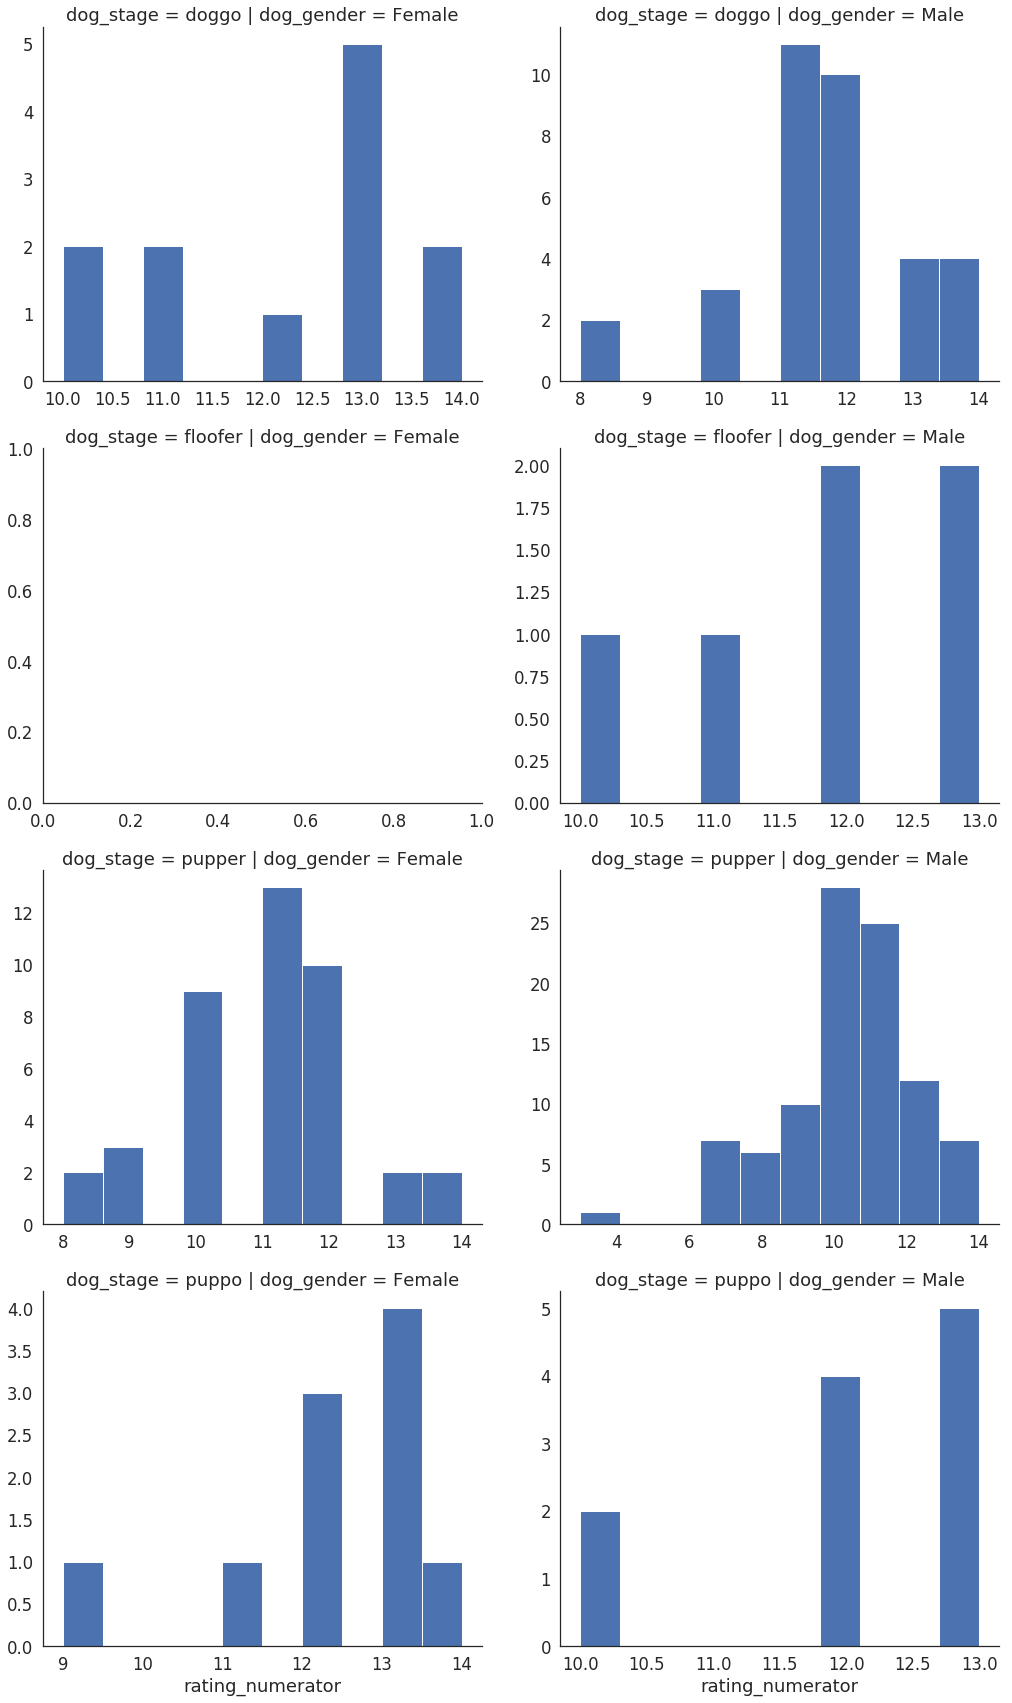

In [289]:
# set font-size for this plot
with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.FacetGrid(df, row="dog_stage", col="dog_gender",
                      height=6, aspect=1.2, 
                      sharex=False, sharey=False);
    
    # plot histogram
    g = g.map(plt.hist, "rating_numerator");


The plot shows a lot of information.
- We can see *puppers* got low ratings. they've been bad bois!
- There are no plots for 'Female' floofers
- 'Female' doggos and puppos have better ratings than their counterparts

In [290]:
df.set_index('tweet_date',inplace=True)

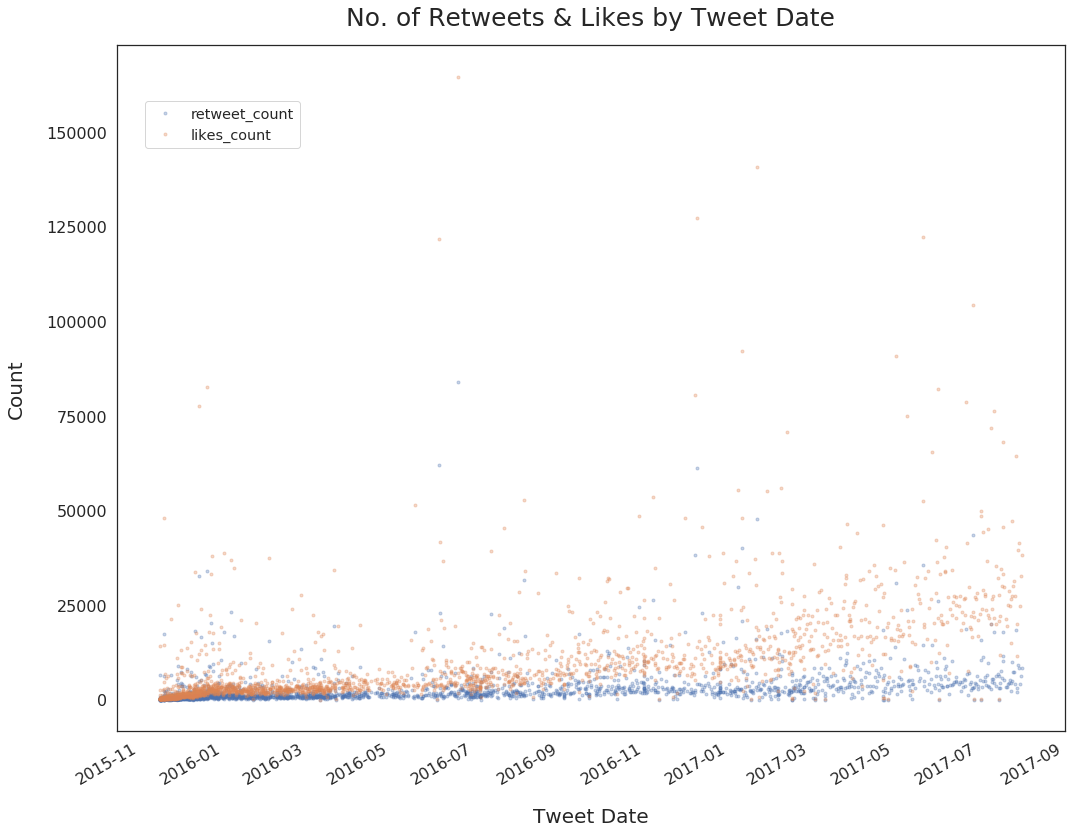

In [291]:
#plot
fig = df[['retweet_count','likes_count']].plot(style='.',alpha=0.3,figsize=(17,14),
                                              fontsize=16);

# set plot title,labels..etc
plt.title('No. of Retweets & Likes by Tweet Date',fontsize=25,pad=20);
plt.xlabel('Tweet Date',fontsize=20,labelpad=20);
plt.ylabel('Count',fontsize=20,labelpad=20);

# get legend handles
patches, labels = fig.get_legend_handles_labels();

# set legend
fig.legend(patches, labels, loc=(0.03,0.85),fontsize='x-large');

The number of likes and retweets are clustered at 2015 but as year progresses, they become more dispersed

## Conclusion

Planning to get a dog? get 'Female' puppos. You can watch them grow. Spend time with them. Take pictures and send it to [@dog_rates](https://twitter.com/dog_rates). You'll have a better chance of getting a better rating.

But really...who cares about rating! Get any dog, cause they're all good dogs friend!

## References

1. https://stackoverflow.com/questions/40489821/how-to-write-text-above-the-bars-on-a-bar-plot-python
2. https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid/27714134#27714134
3. https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-an-ipython-notebook

Thanks to `kmahelona` who has provided code for TOC content creation which I've used in my notebook. Visit his [GITHUB PAGE](https://github.com/kmahelona/ipython_notebook_goodies) for details.

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>